# Case Study: Predicting Company Bankruptcy Using Financial Data

In [158]:
# Importing Required Libraries for DataFrames and Data-loading
import numpy as np
import pandas as pd

# Importing Required Libraries for Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Required Libraries for Testing and Modelling 
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats
from scipy.stats import ttest_ind


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# import scikit-learn for machine learning


import matplotlib.cm as cm
import seaborn as sb
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
# importing matplotlib & seaborn for plotting graphs


import scipy.stats as stats

# Data Understanding and Preprocessing:

# Load and inspect the dataset.

In [159]:
df=pd.read_csv('data.csv')

In [160]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [162]:
df.shape

(6819, 96)

In [163]:
# remove whitespaces and replacig special symbols of columns

df.columns=df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('/','_')
df.columns = df.columns.str.replace('?','')
df.columns = df.columns.str.replace('-','_')
df.columns = df.columns.str.replace('%','_')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt                                           6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestand_aftertax                   6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre_taxnetInterestRate                             6819 non-null   float64
 8   After_taxnetInterestRate                           6819 non-null   float64
 9   Non_indu

# Handle missing values appropriately.

In [165]:
df.isnull().sum()
#there is zero missing values or null values present in dataset

Bankrupt                                             0
ROA(C)beforeinterestanddepreciationbeforeinterest    0
ROA(A)beforeinterestand_aftertax                     0
ROA(B)beforeinterestanddepreciationaftertax          0
OperatingGrossMargin                                 0
RealizedSalesGrossMargin                             0
OperatingProfitRate                                  0
Pre_taxnetInterestRate                               0
After_taxnetInterestRate                             0
Non_industryincomeandexpenditure_revenue             0
Continuousinterestrate(aftertax)                     0
OperatingExpenseRate                                 0
Researchanddevelopmentexpenserate                    0
Cashflowrate                                         0
Interest_bearingdebtinterestrate                     0
Taxrate(A)                                           0
NetValuePerShare(B)                                  0
NetValuePerShare(A)                                  0
NetValuePe

In [166]:
df[df.duplicated()].count()

Bankrupt                                             0
ROA(C)beforeinterestanddepreciationbeforeinterest    0
ROA(A)beforeinterestand_aftertax                     0
ROA(B)beforeinterestanddepreciationaftertax          0
OperatingGrossMargin                                 0
RealizedSalesGrossMargin                             0
OperatingProfitRate                                  0
Pre_taxnetInterestRate                               0
After_taxnetInterestRate                             0
Non_industryincomeandexpenditure_revenue             0
Continuousinterestrate(aftertax)                     0
OperatingExpenseRate                                 0
Researchanddevelopmentexpenserate                    0
Cashflowrate                                         0
Interest_bearingdebtinterestrate                     0
Taxrate(A)                                           0
NetValuePerShare(B)                                  0
NetValuePerShare(A)                                  0
NetValuePe

In [44]:
df.isnull().sum()

Bankrupt                                             0
ROA(C)beforeinterestanddepreciationbeforeinterest    0
ROA(A)beforeinterestand_aftertax                     0
ROA(B)beforeinterestanddepreciationaftertax          0
OperatingGrossMargin                                 0
RealizedSalesGrossMargin                             0
OperatingProfitRate                                  0
Pre_taxnetInterestRate                               0
After_taxnetInterestRate                             0
Non_industryincomeandexpenditure_revenue             0
Continuousinterestrate(aftertax)                     0
OperatingExpenseRate                                 0
Researchanddevelopmentexpenserate                    0
Cashflowrate                                         0
Interest_bearingdebtinterestrate                     0
Taxrate(A)                                           0
NetValuePerShare(B)                                  0
NetValuePerShare(A)                                  0
NetValuePe

In [45]:
df.columns

Index(['Bankrupt', 'ROA(C)beforeinterestanddepreciationbeforeinterest',
       'ROA(A)beforeinterestand_aftertax',
       'ROA(B)beforeinterestanddepreciationaftertax', 'OperatingGrossMargin',
       'RealizedSalesGrossMargin', 'OperatingProfitRate',
       'Pre_taxnetInterestRate', 'After_taxnetInterestRate',
       'Non_industryincomeandexpenditure_revenue',
       'Continuousinterestrate(aftertax)', 'OperatingExpenseRate',
       'Researchanddevelopmentexpenserate', 'Cashflowrate',
       'Interest_bearingdebtinterestrate', 'Taxrate(A)', 'NetValuePerShare(B)',
       'NetValuePerShare(A)', 'NetValuePerShare(C)',
       'PersistentEPSintheLastFourSeasons', 'CashFlowPerShare',
       'RevenuePerShare(Yuan¥)', 'OperatingProfitPerShare(Yuan¥)',
       'PerShareNetprofitbeforetax(Yuan¥)',
       'RealizedSalesGrossProfitGrowthRate', 'OperatingProfitGrowthRate',
       'After_taxNetProfitGrowthRate', 'RegularNetProfitGrowthRate',
       'ContinuousNetProfitGrowthRate', 'TotalAssetGrowthRa

In [47]:
#only need continuous data from dataframe
columns_drop = ['NetIncomeFlag','Liability_AssetsFlag','Bankrupt']
df1=df.drop(columns=columns_drop)

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 93 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 1   ROA(A)beforeinterestand_aftertax                   6819 non-null   float64
 2   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 3   OperatingGrossMargin                               6819 non-null   float64
 4   RealizedSalesGrossMargin                           6819 non-null   float64
 5   OperatingProfitRate                                6819 non-null   float64
 6   Pre_taxnetInterestRate                             6819 non-null   float64
 7   After_taxnetInterestRate                           6819 non-null   float64
 8   Non_industryincomeandexpenditure_revenue           6819 non-null   float64
 9   Continuo

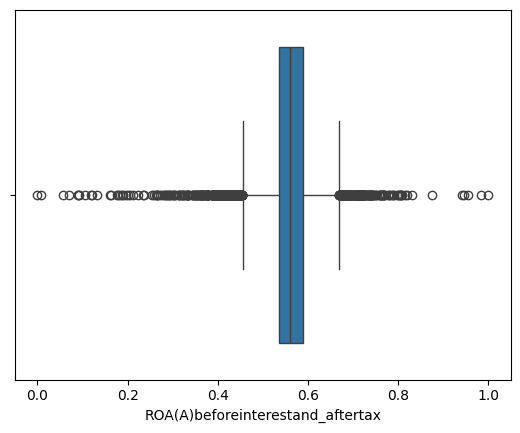

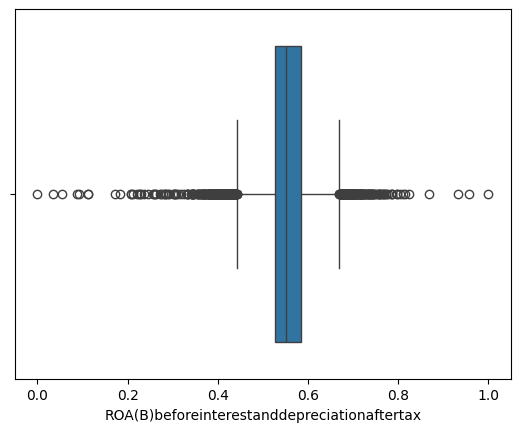

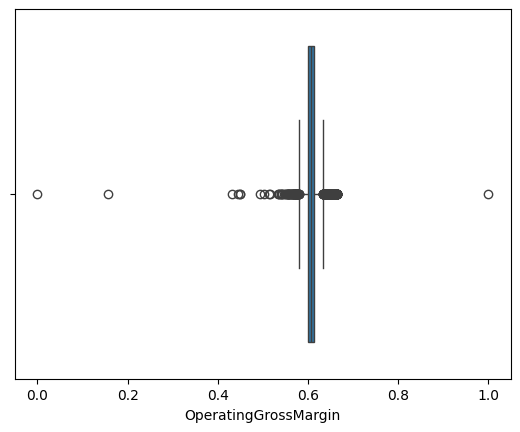

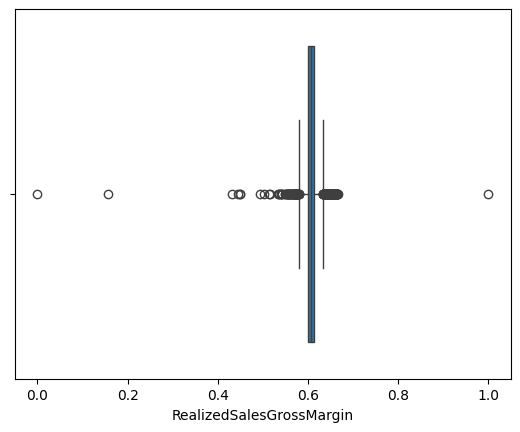

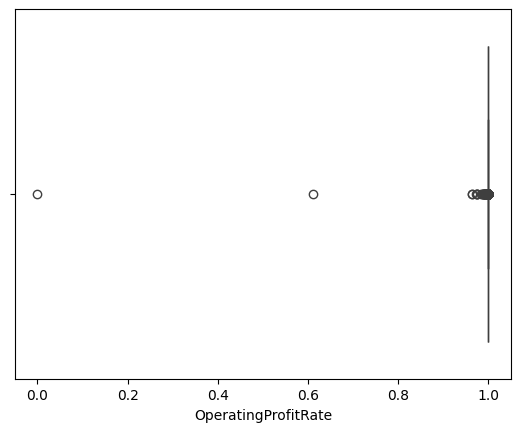

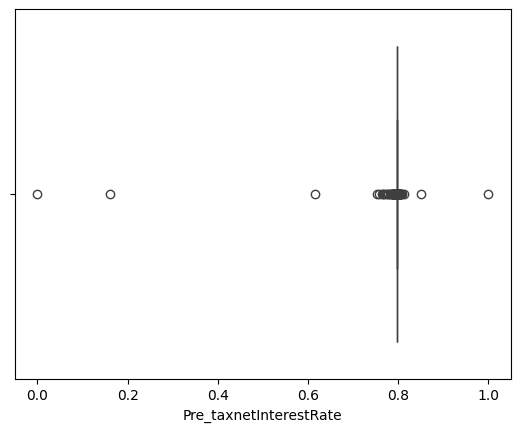

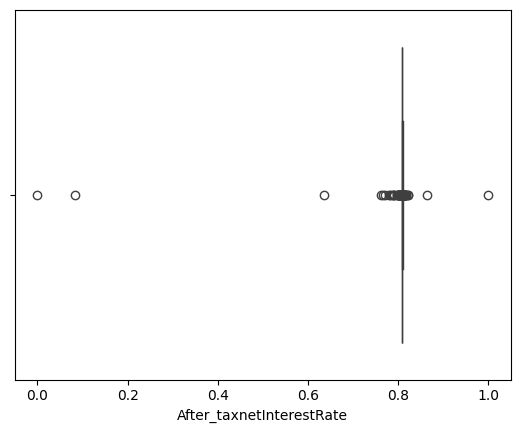

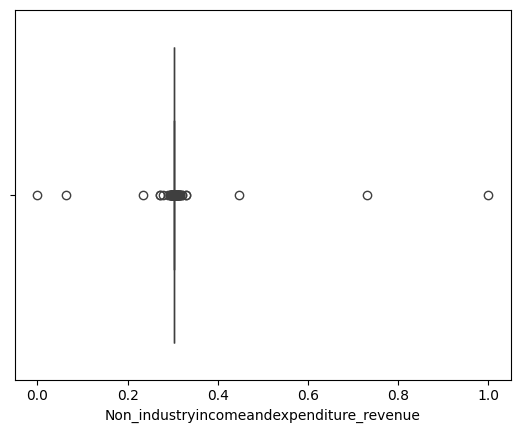

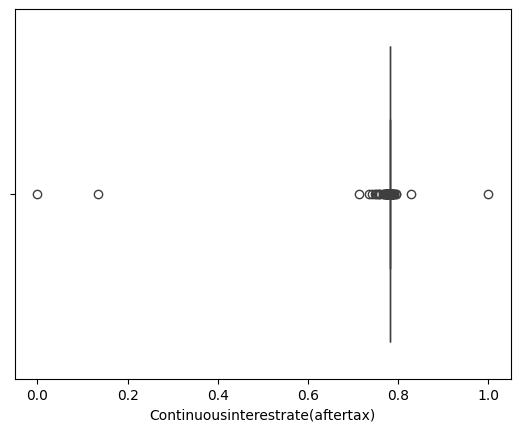

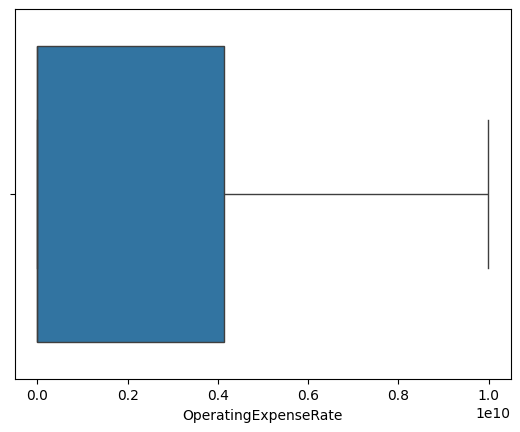

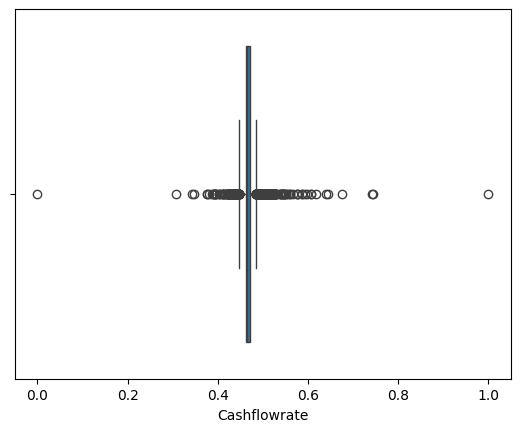

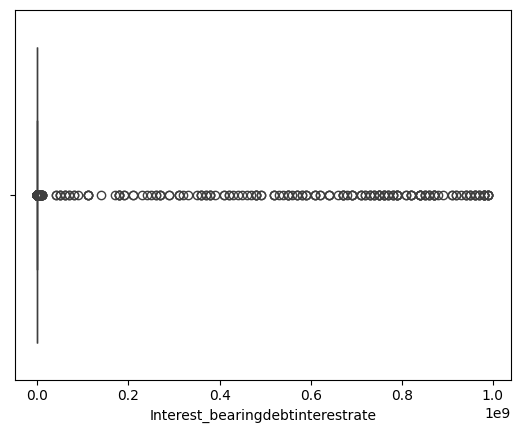

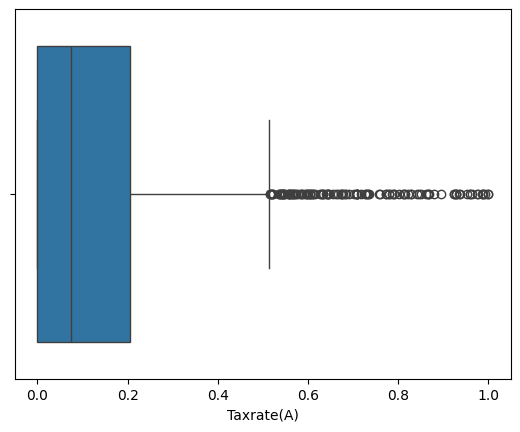

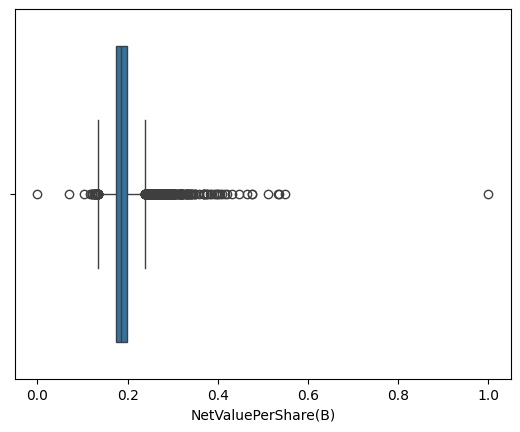

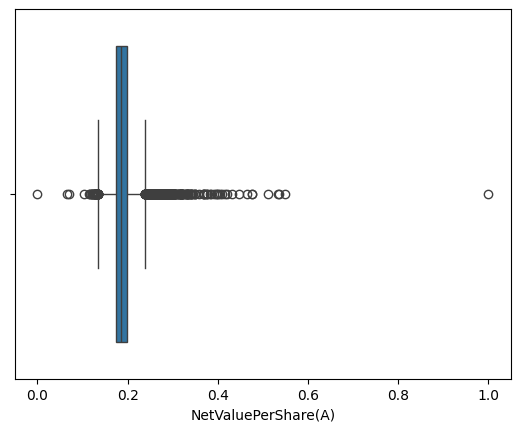

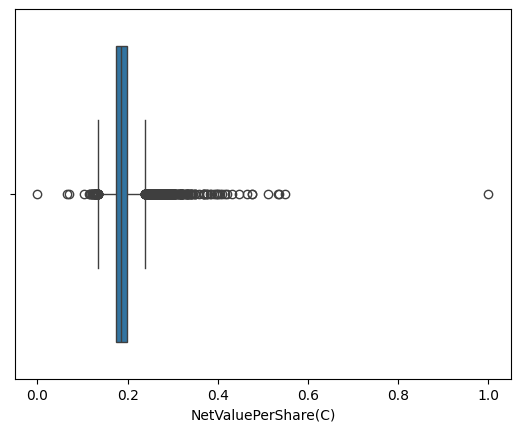

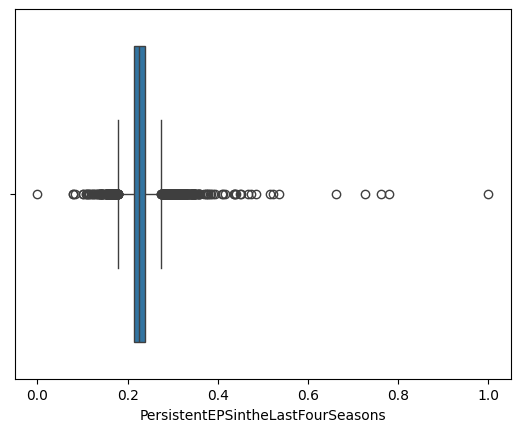

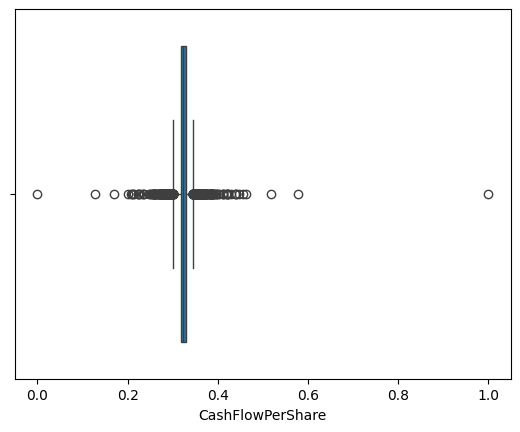

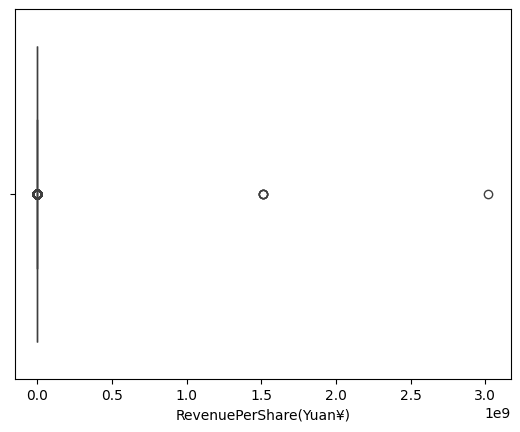

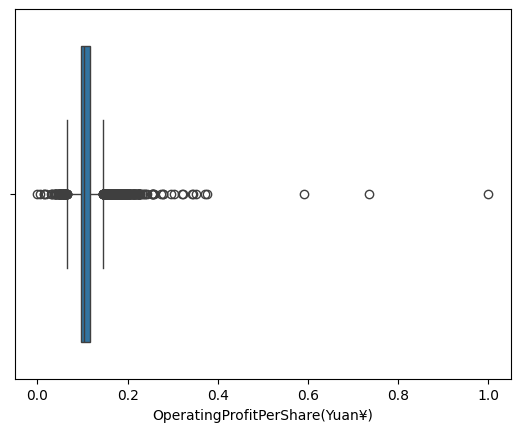

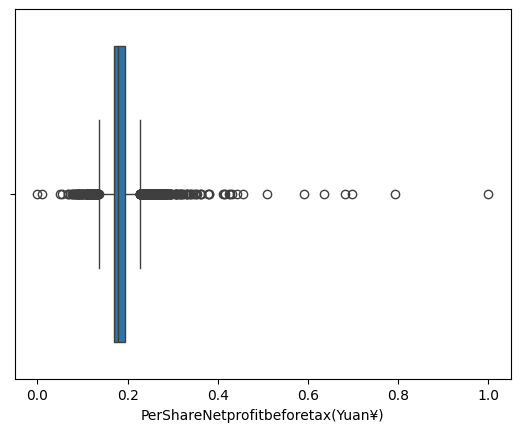

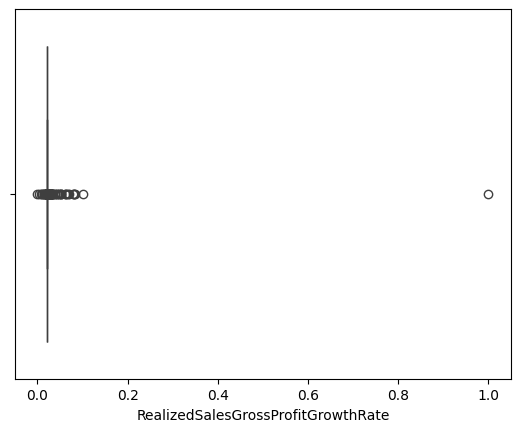

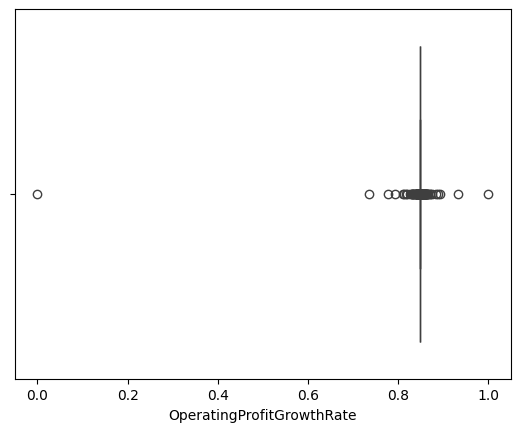

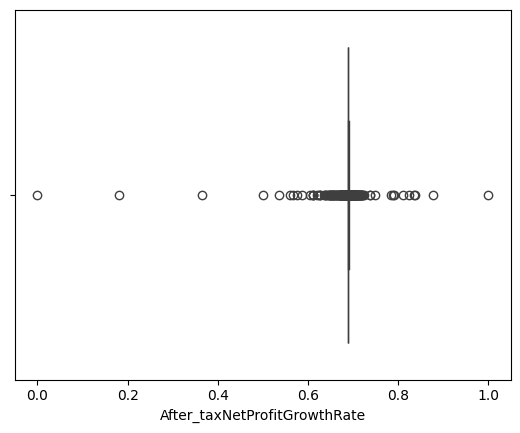

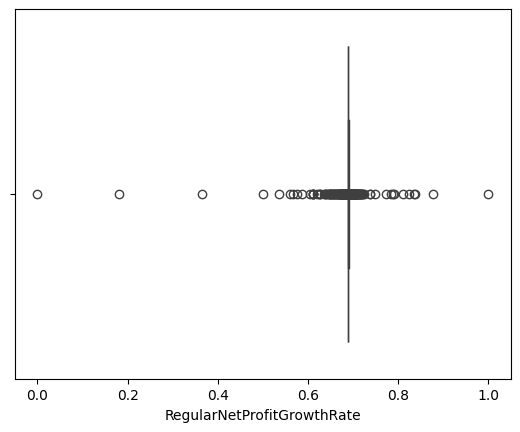

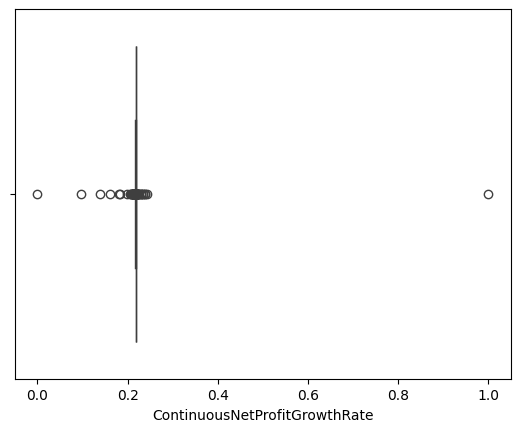

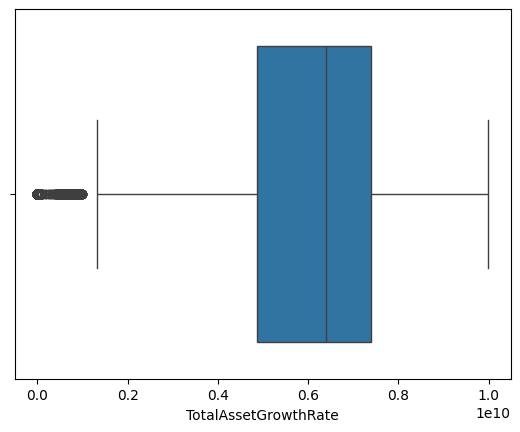

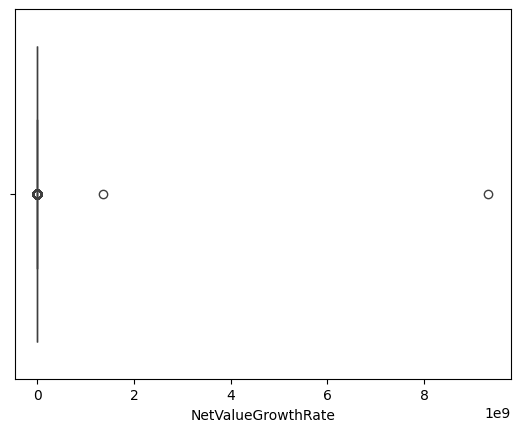

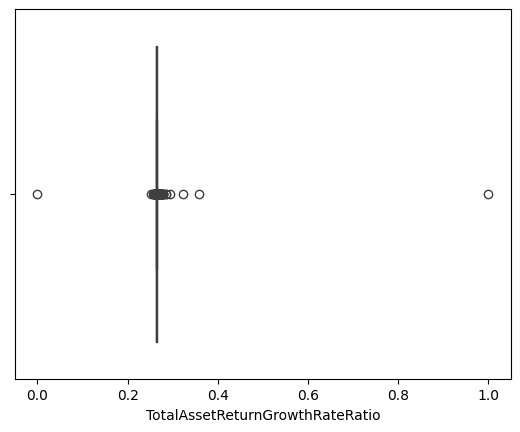

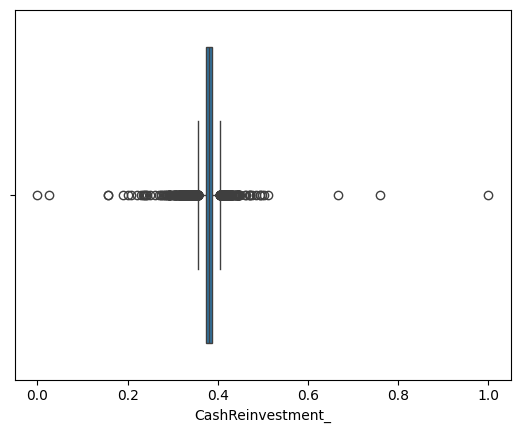

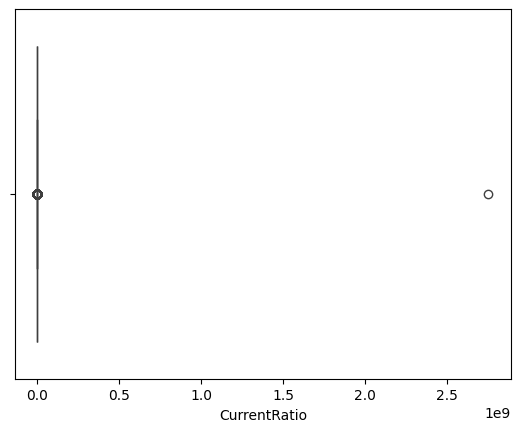

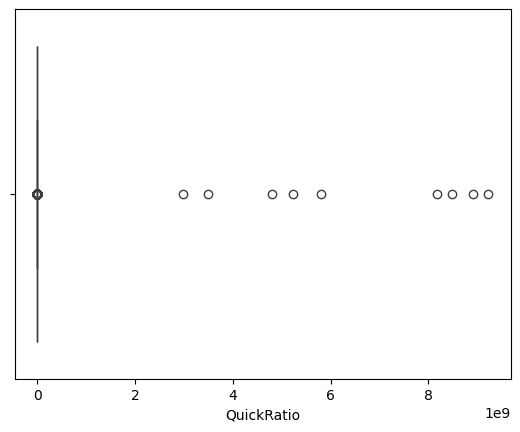

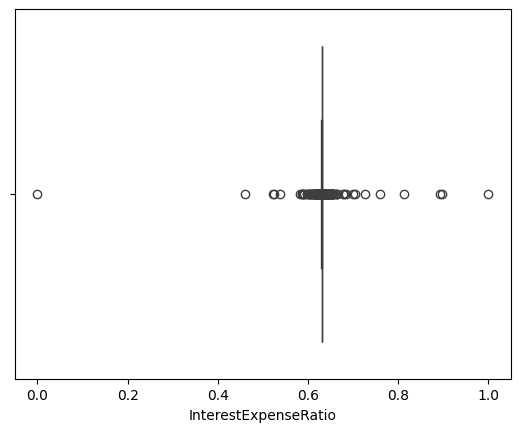

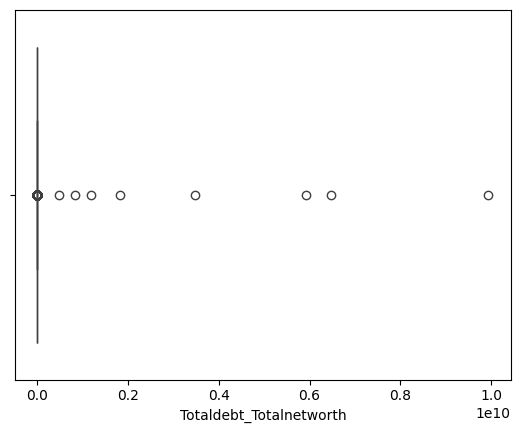

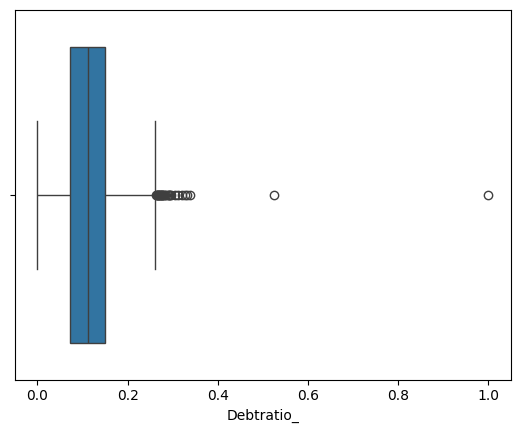

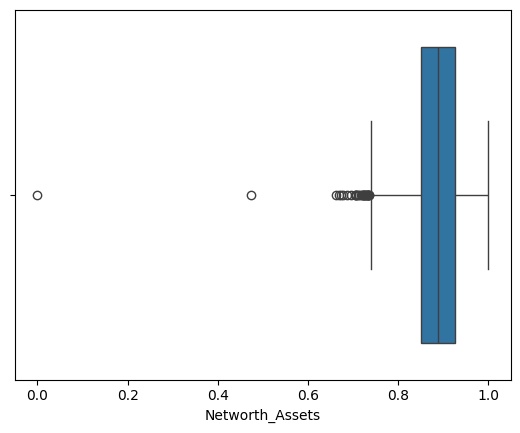

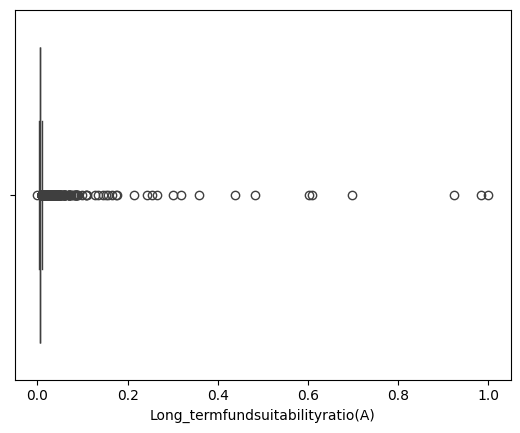

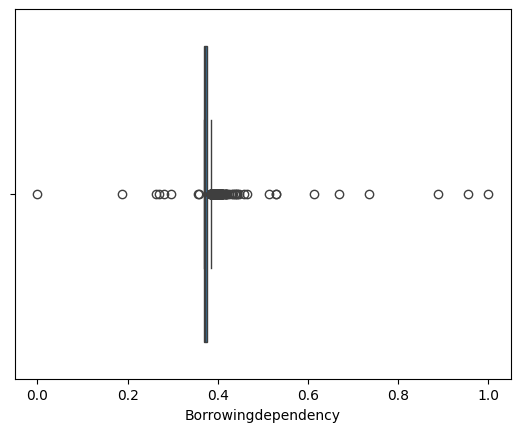

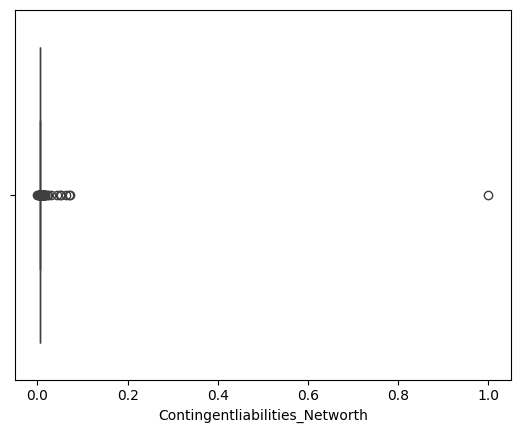

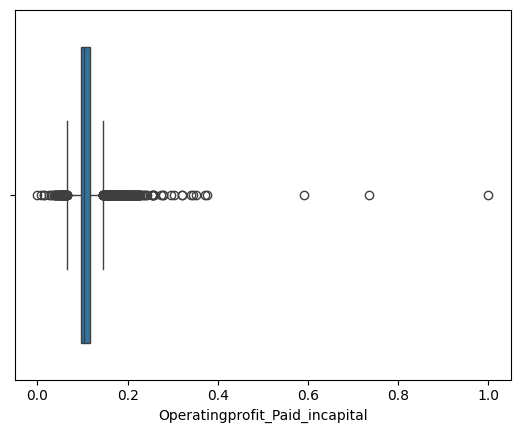

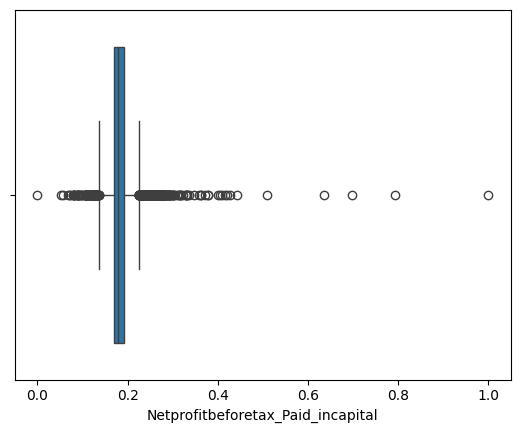

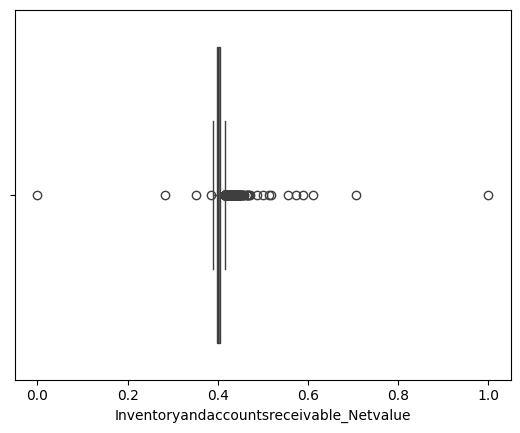

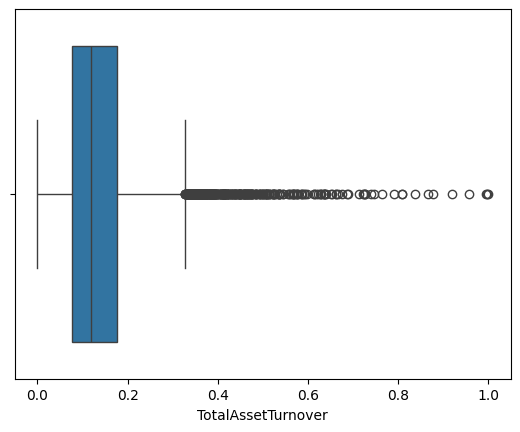

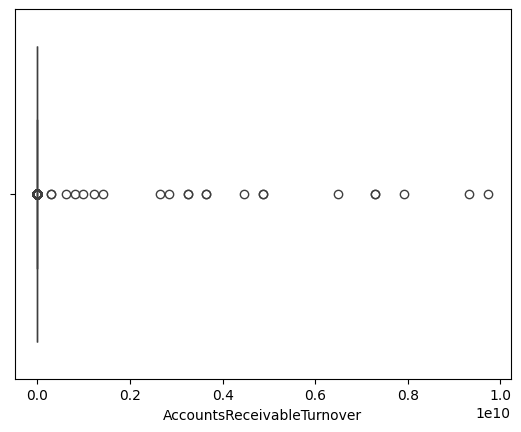

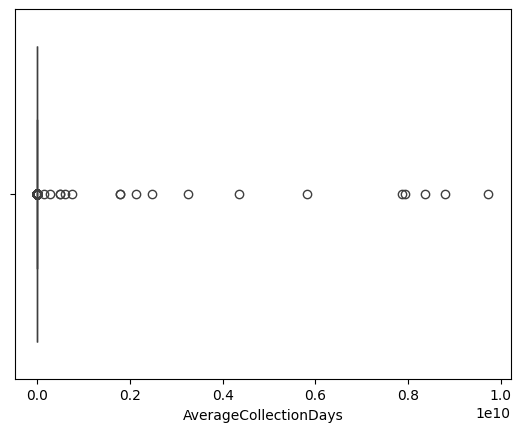

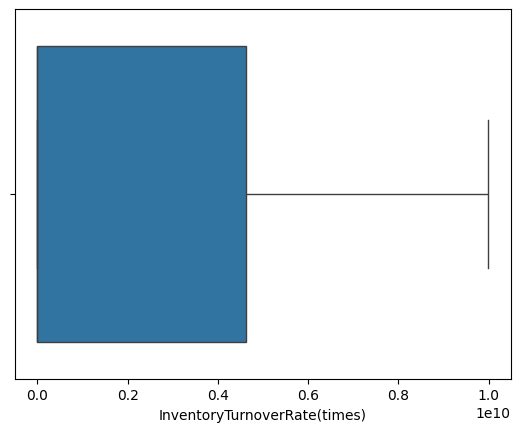

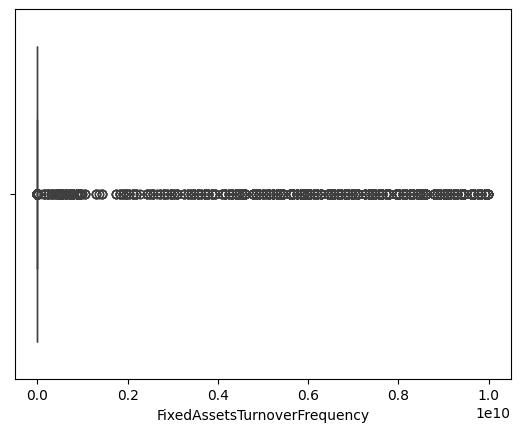

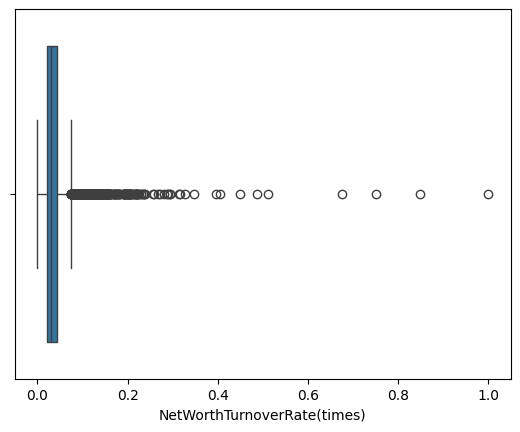

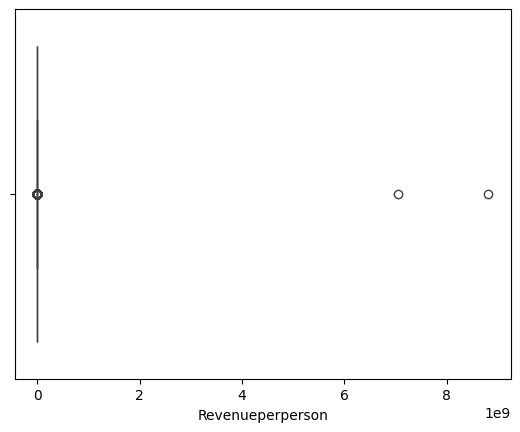

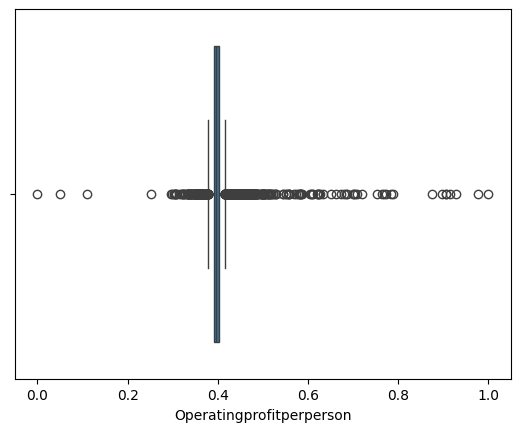

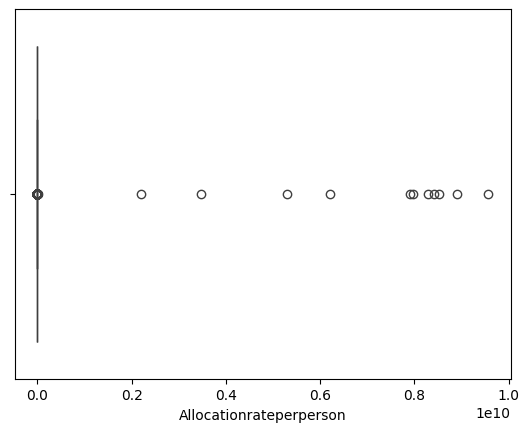

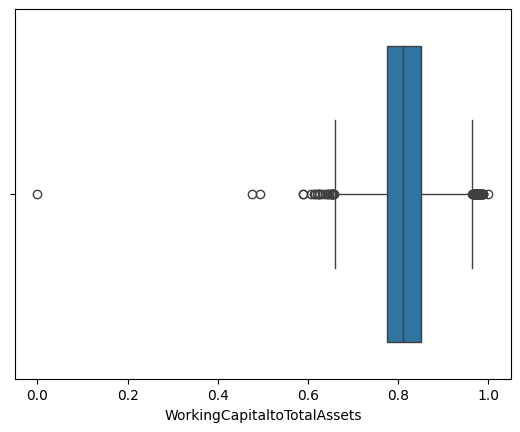

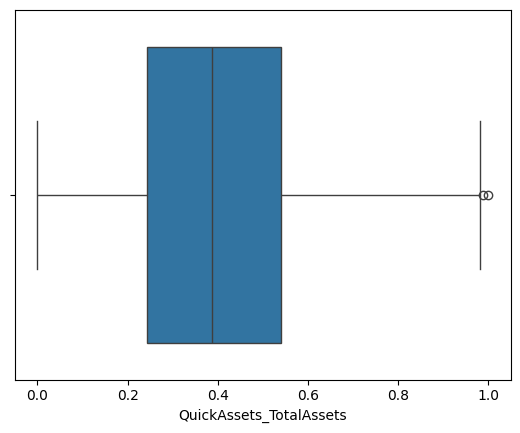

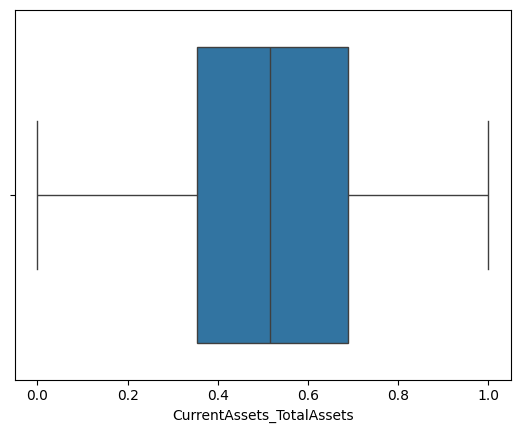

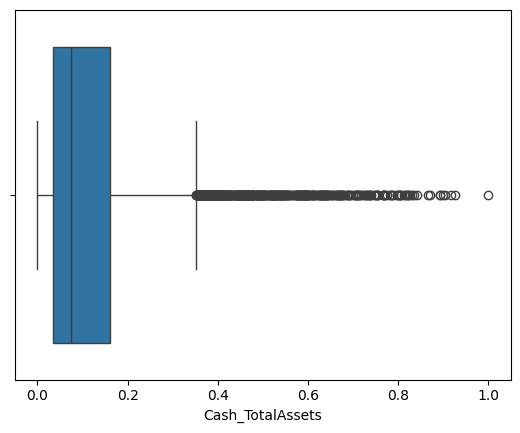

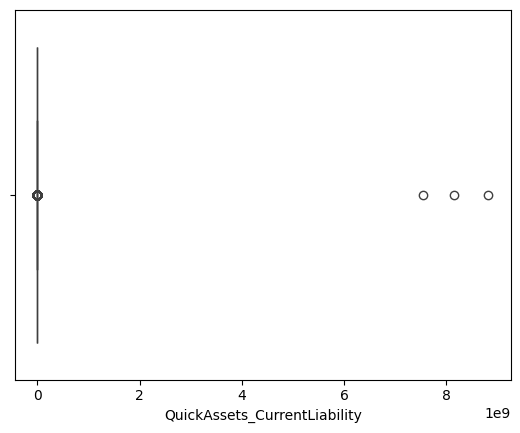

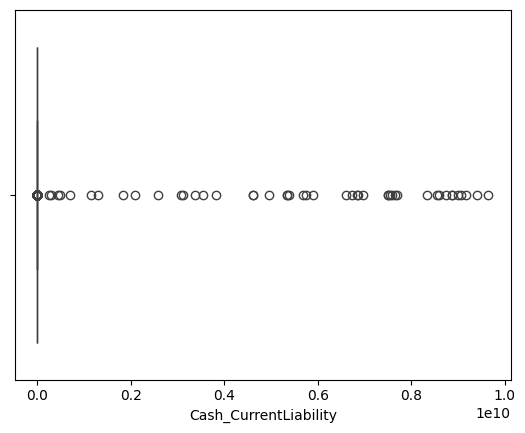

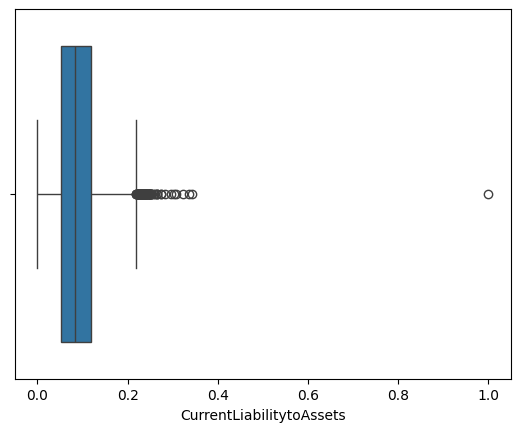

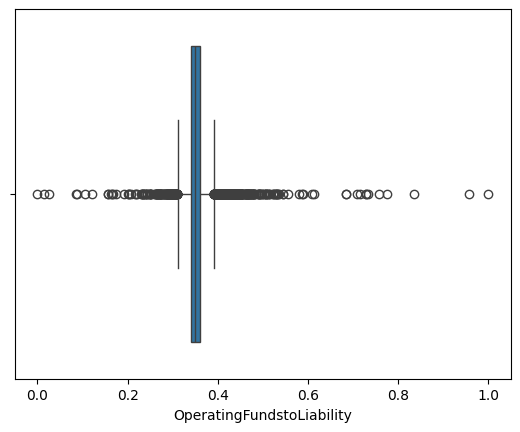

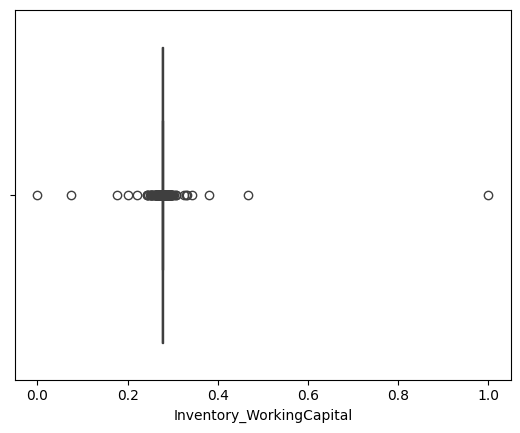

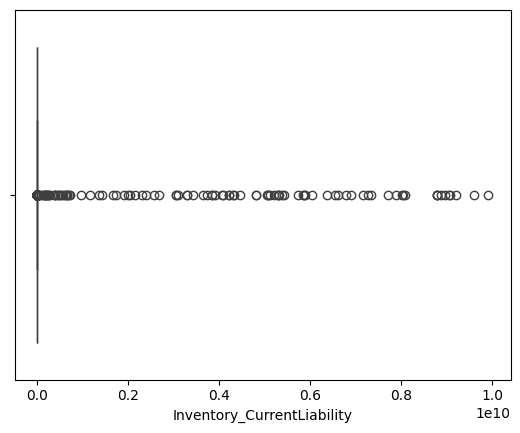

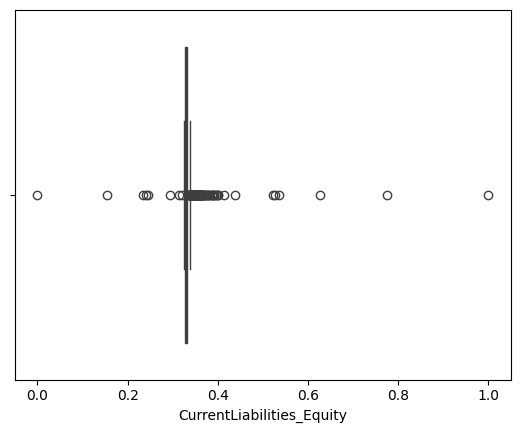

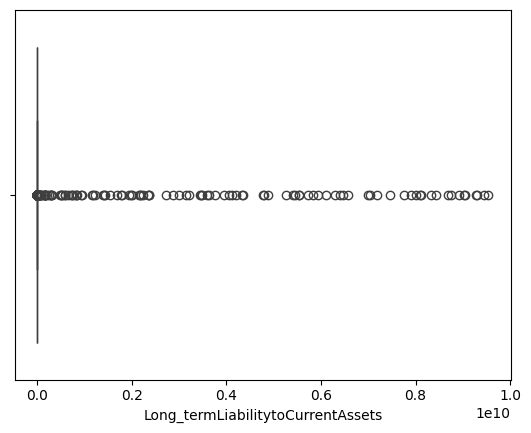

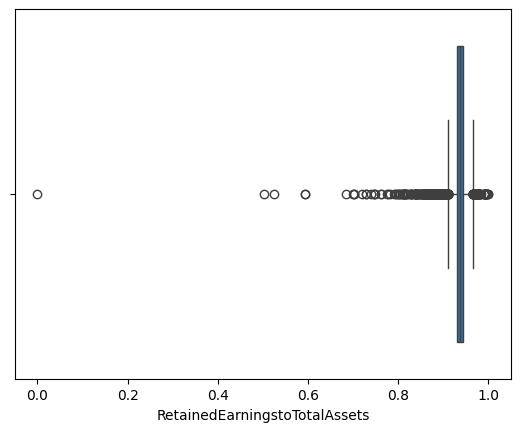

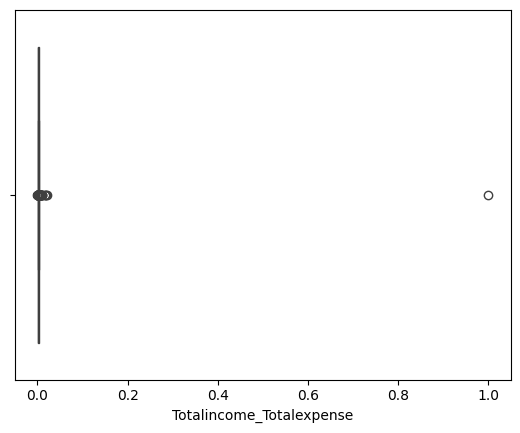

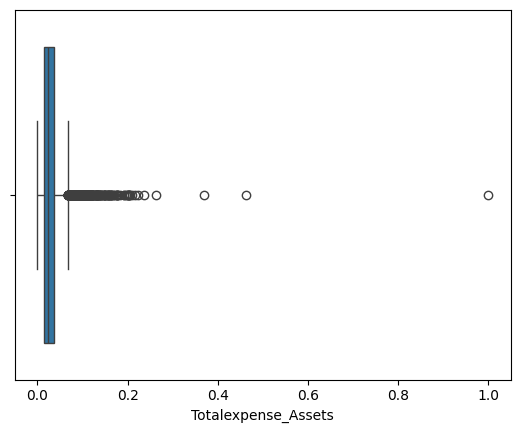

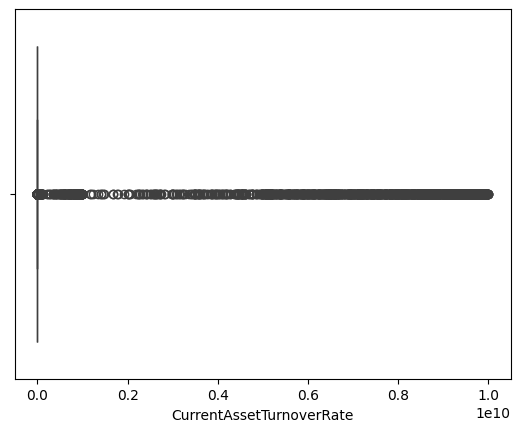

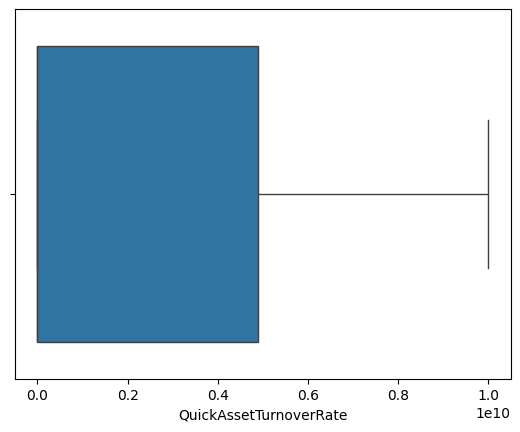

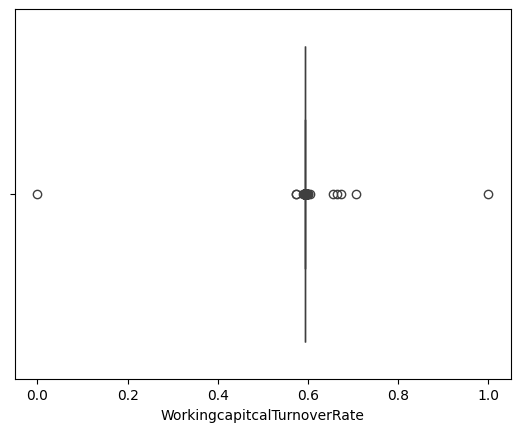

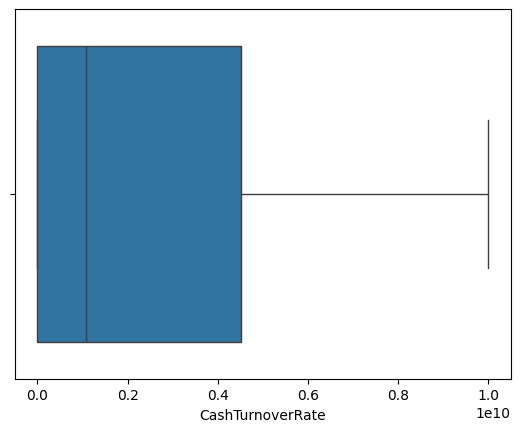

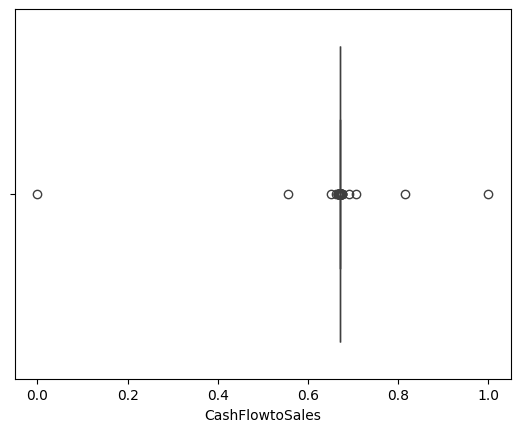

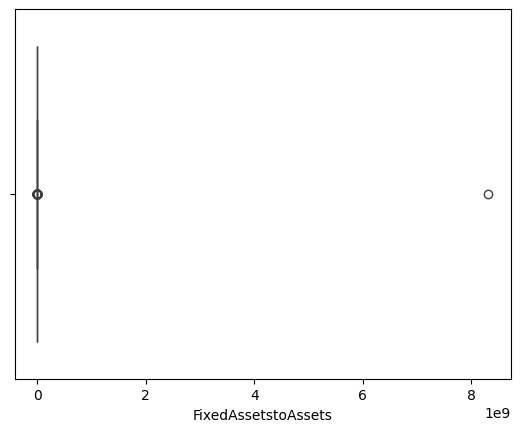

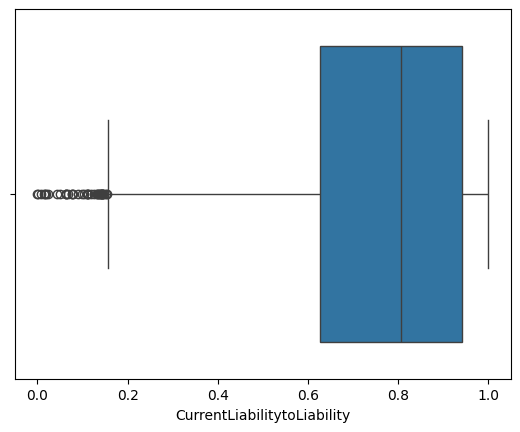

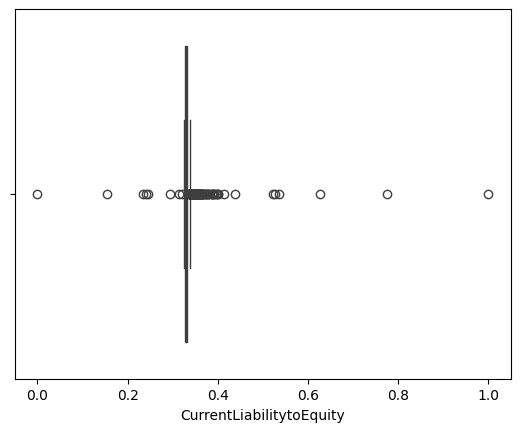

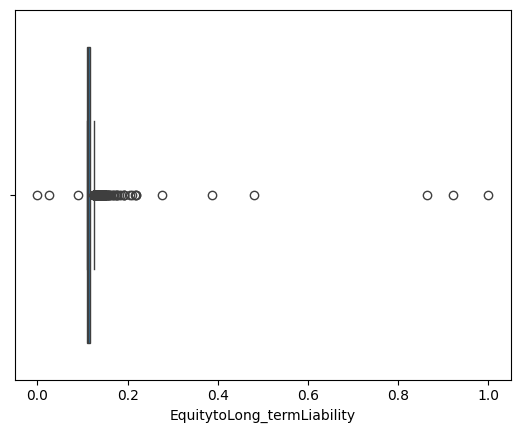

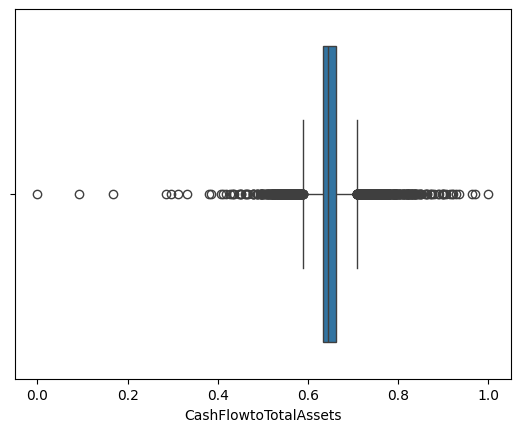

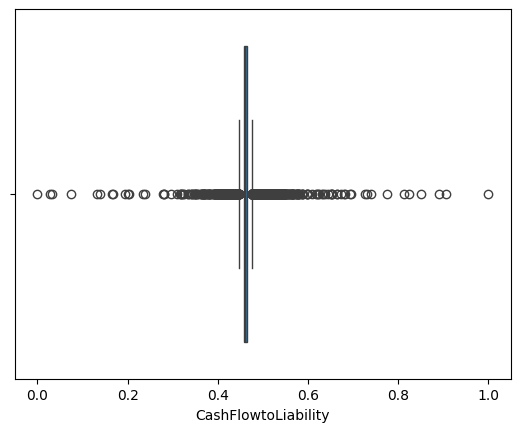

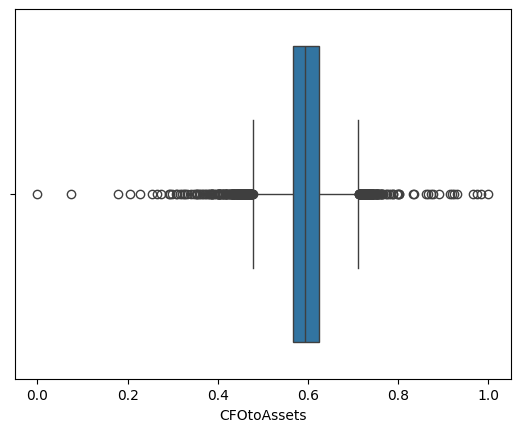

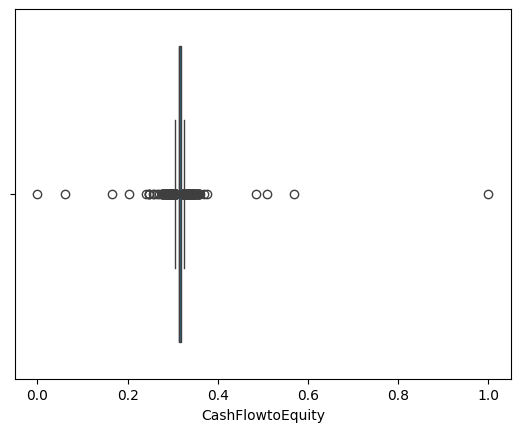

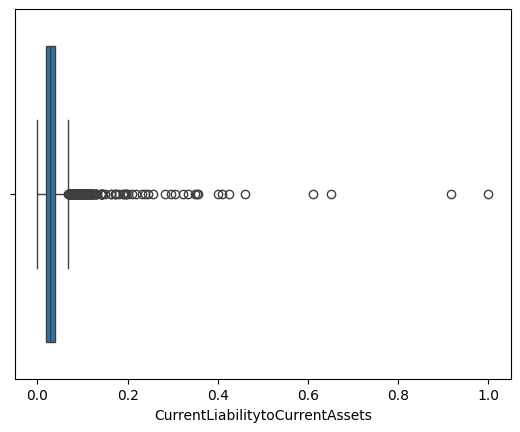

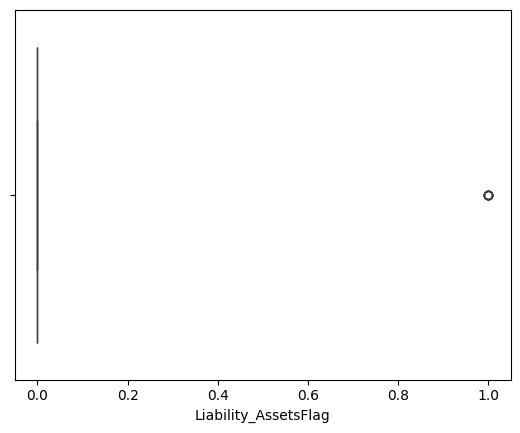

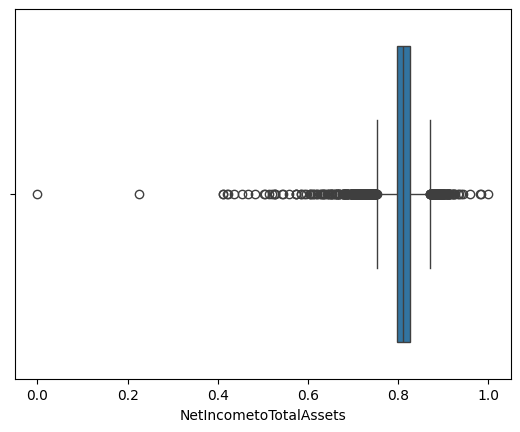

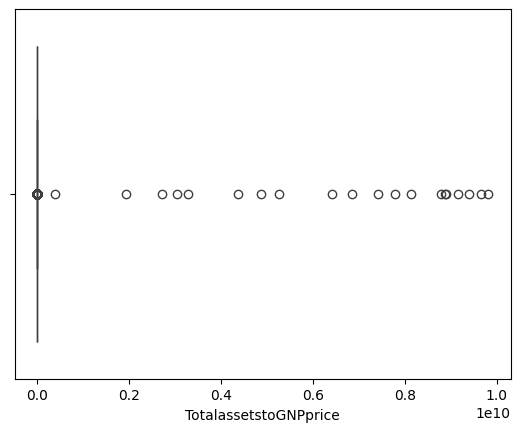

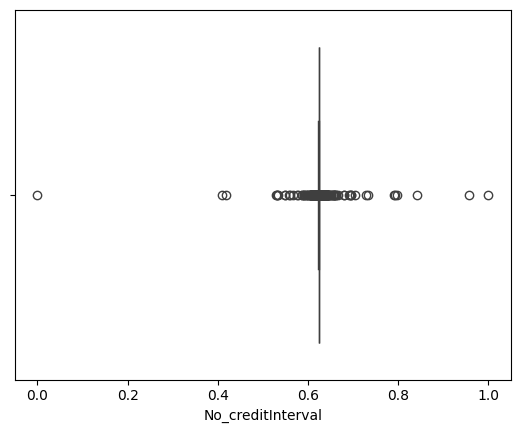

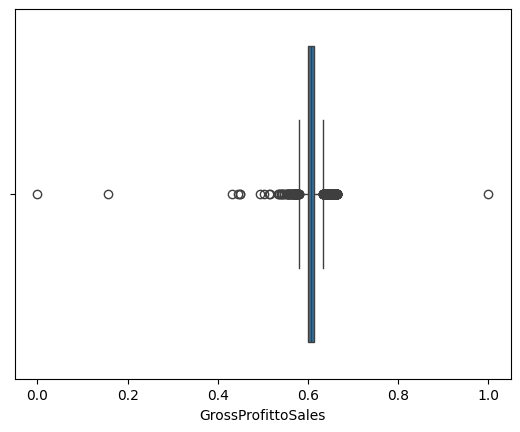

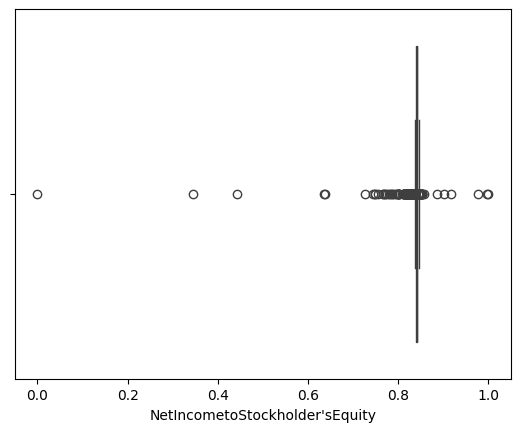

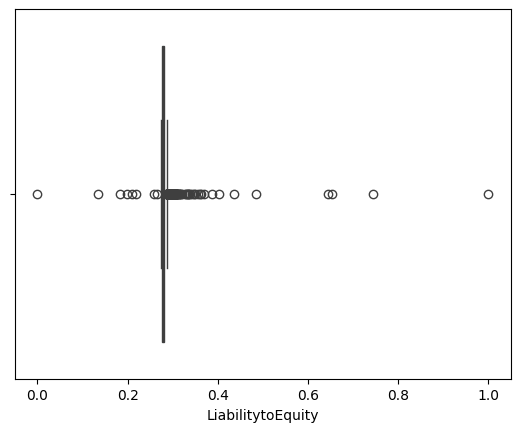

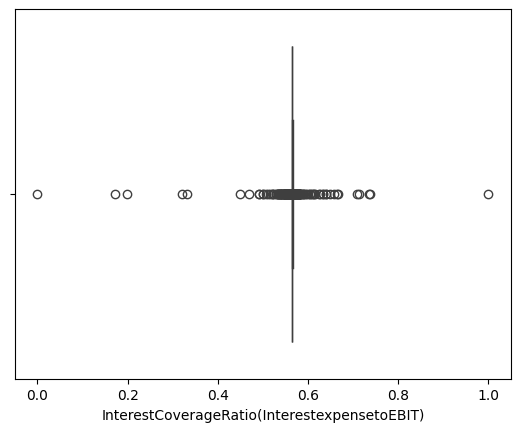

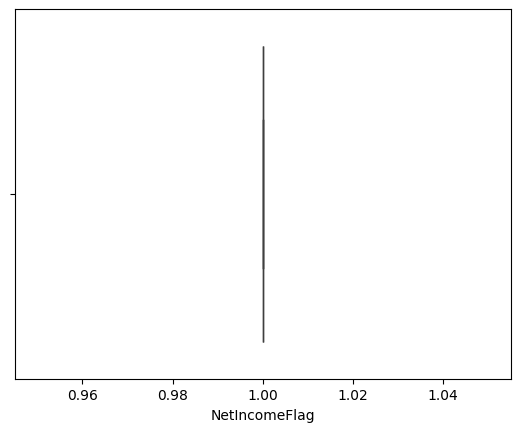

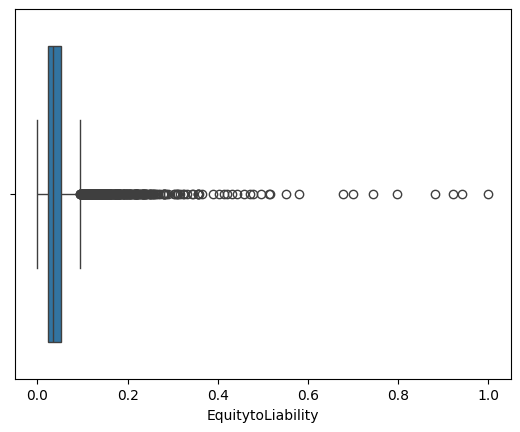

In [88]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

In [89]:
# Function to detect outliers using IQR for all columns
def detect_outliers_iqr(df1):
    outliers = {}
    for column in df1.columns:
        if df1[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df1[(df1[column] < lower_bound) | (df1[column] > upper_bound)]
    return outliers

print("================================================================================")

# Detect outliers in all columns
outliers = detect_outliers_iqr(df1)

# Print the number of outliers for each feature

count = 0

for feature, outlier_data in outliers.items():
    print(f'{feature}: {len(outlier_data)} outliers')
    if len(outlier_data) > 0:
        count+=1

print("=============================================================================================")
    
# Function to cap outliers for all columns using IQR
def cap_outliers(df1):
    for column in df1.columns:
        if df1[column].dtype != 'object':  # Ensure the column is numerical
            Q1 = df1[column].quantile(0.25)
            Q3 = df1[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df1[column] = np.where(df1[column] < lower_bound, lower_bound, df1[column])
            df1[column] = np.where(df1[column] > upper_bound, upper_bound, df1[column])
    return df1

# Handle outliers in all columns
data_cleaned = cap_outliers(df1)

# Verify the changes

print("----------------------------------------------------------------------------")

print("Outliers have been capped.")
data_cleaned.describe()

print("------------------------------------------------------------------------------")
print("Outlier Found In : ",count,"  Column")


ROA(C)beforeinterestanddepreciationbeforeinterest: 0 outliers
ROA(A)beforeinterestand_aftertax: 0 outliers
ROA(B)beforeinterestanddepreciationaftertax: 0 outliers
OperatingGrossMargin: 0 outliers
RealizedSalesGrossMargin: 0 outliers
OperatingProfitRate: 0 outliers
Pre_taxnetInterestRate: 0 outliers
After_taxnetInterestRate: 0 outliers
Non_industryincomeandexpenditure_revenue: 0 outliers
Continuousinterestrate(aftertax): 0 outliers
OperatingExpenseRate: 0 outliers
Researchanddevelopmentexpenserate: 0 outliers
Cashflowrate: 0 outliers
Interest_bearingdebtinterestrate: 0 outliers
Taxrate(A): 0 outliers
NetValuePerShare(B): 0 outliers
NetValuePerShare(A): 0 outliers
NetValuePerShare(C): 0 outliers
PersistentEPSintheLastFourSeasons: 0 outliers
CashFlowPerShare: 0 outliers
RevenuePerShare(Yuan¥): 0 outliers
OperatingProfitPerShare(Yuan¥): 0 outliers
PerShareNetprofitbeforetax(Yuan¥): 0 outliers
RealizedSalesGrossProfitGrowthRate: 0 outliers
OperatingProfitGrowthRate: 0 outliers
After_taxNetP

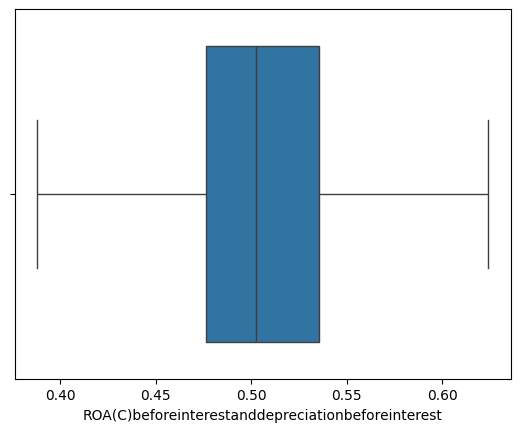

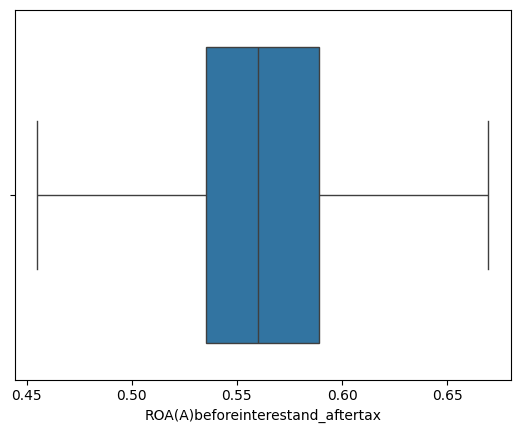

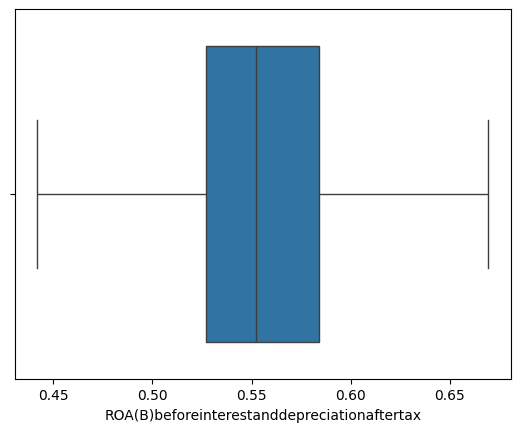

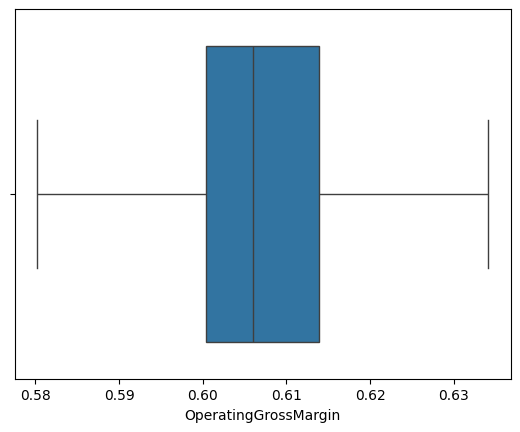

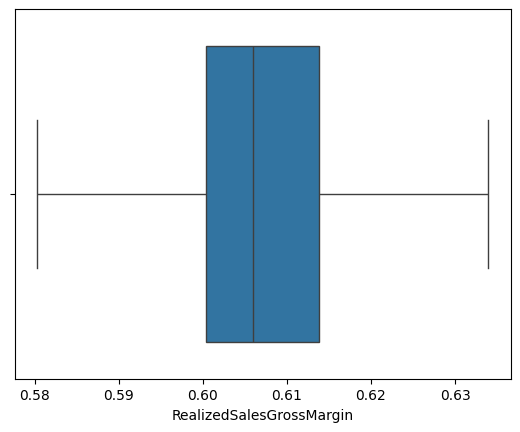

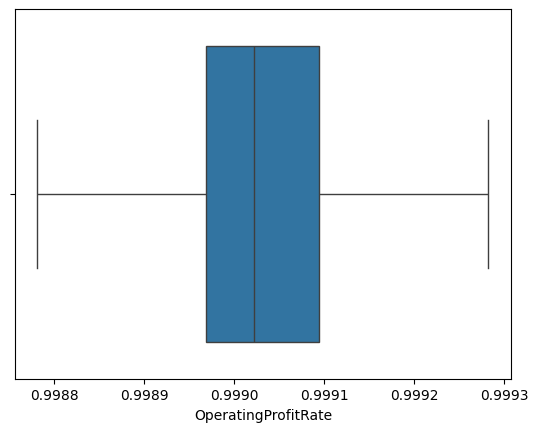

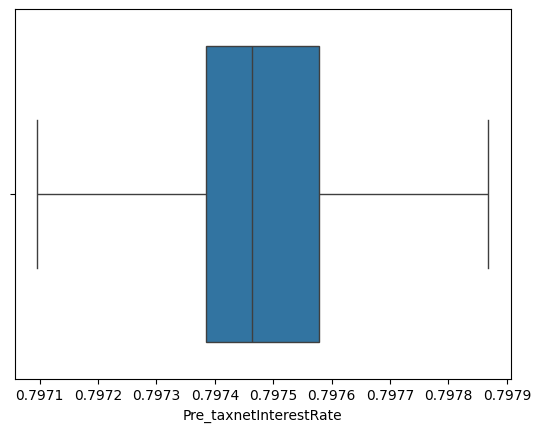

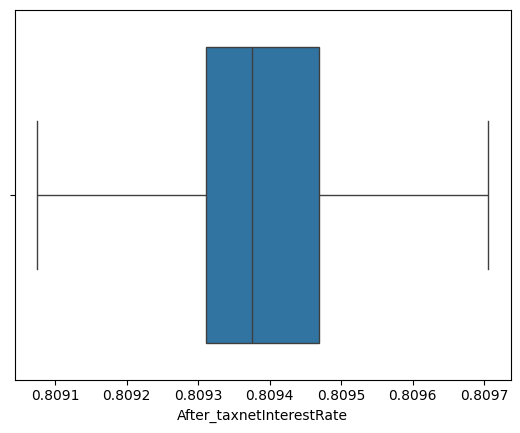

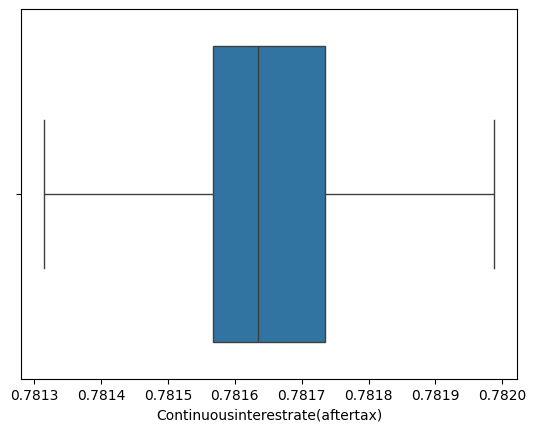

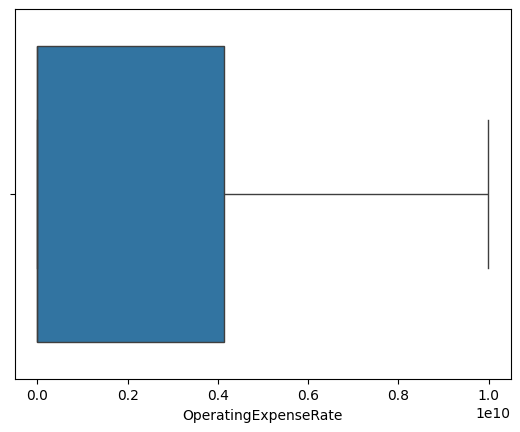

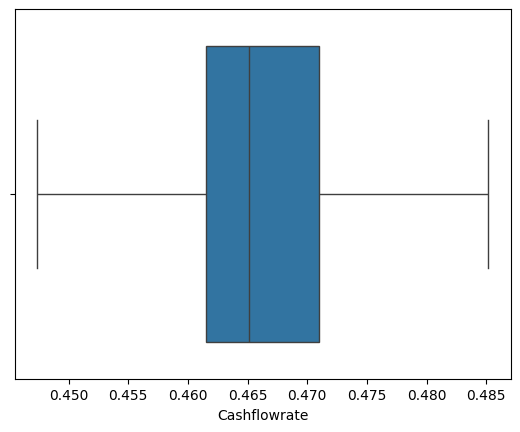

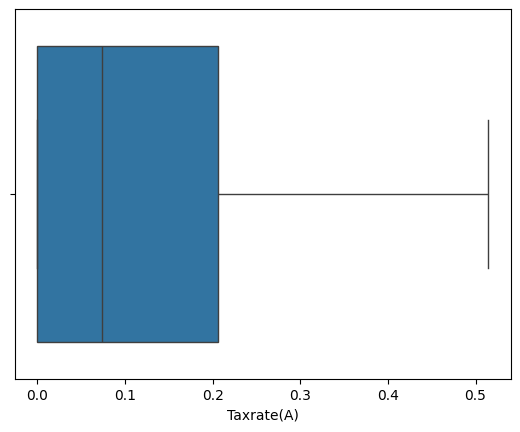

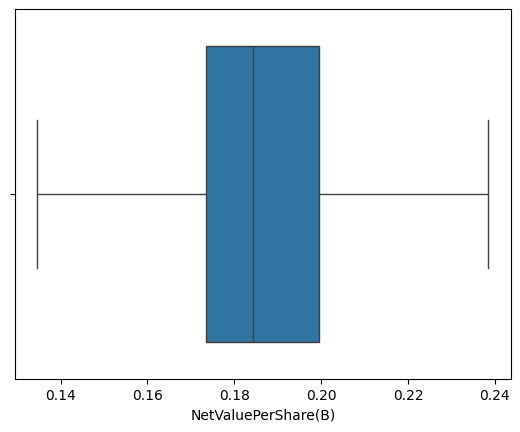

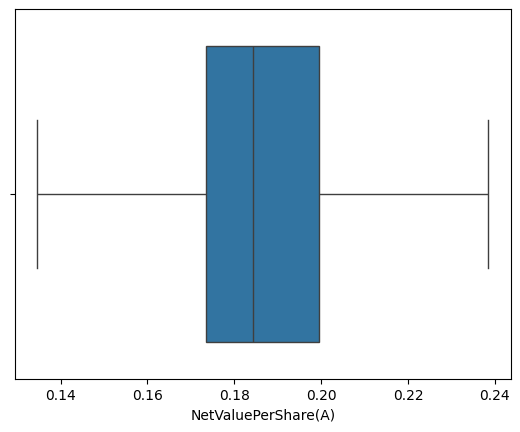

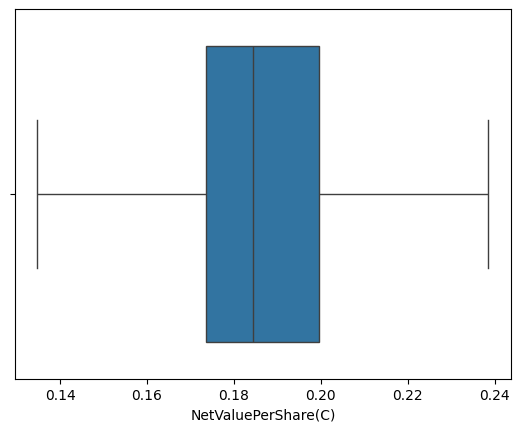

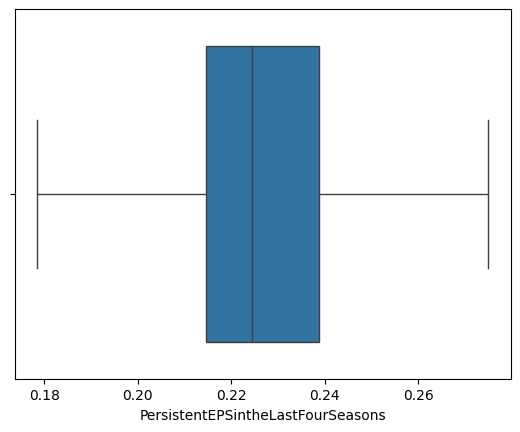

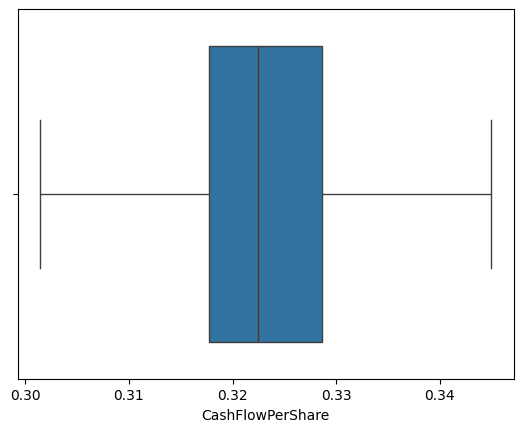

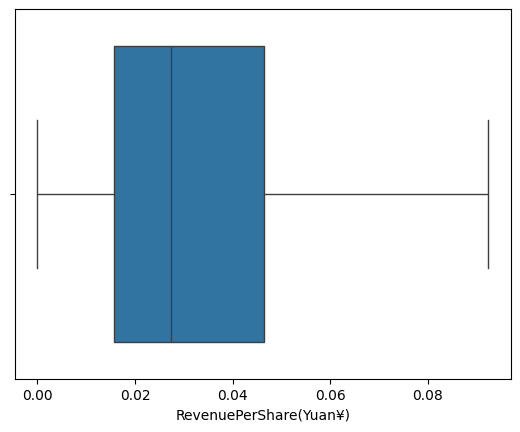

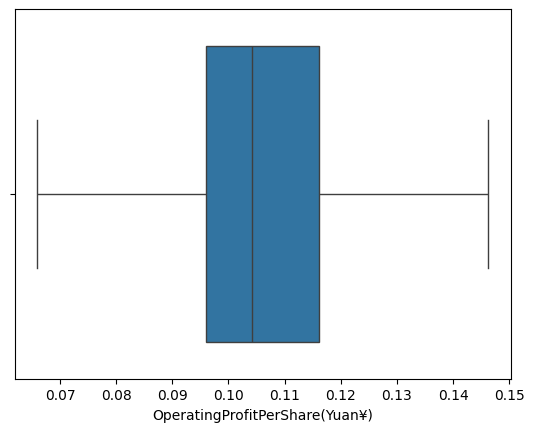

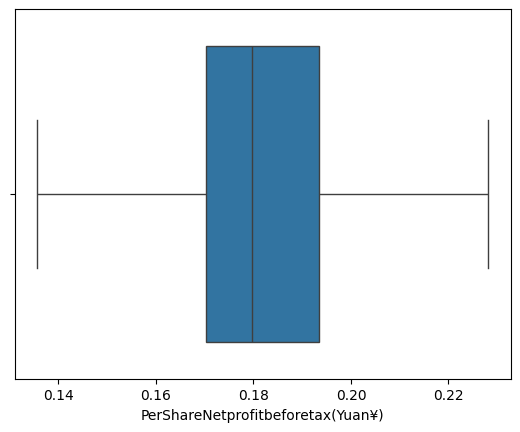

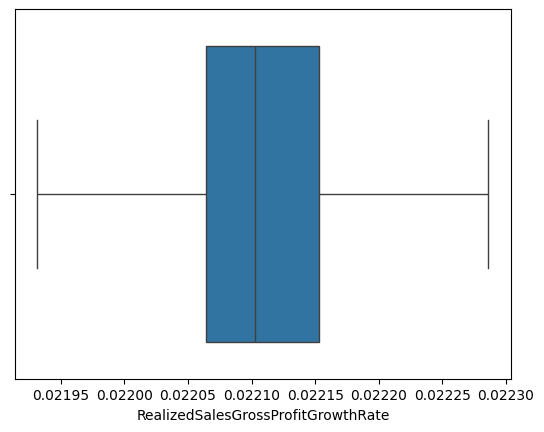

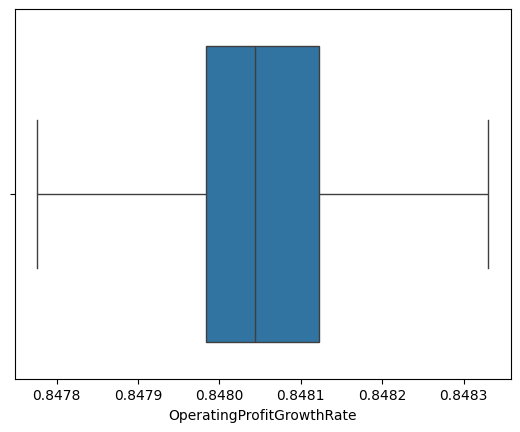

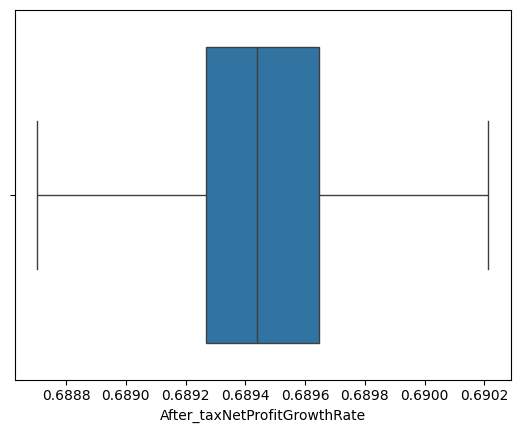

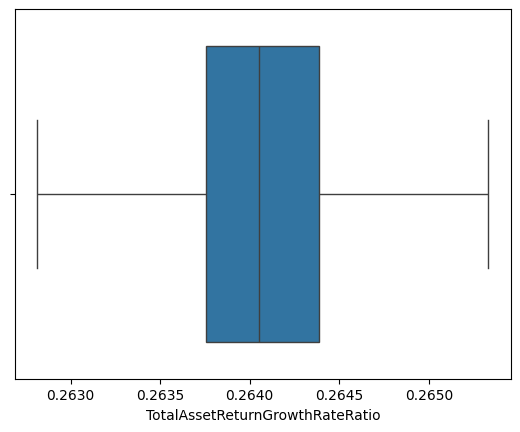

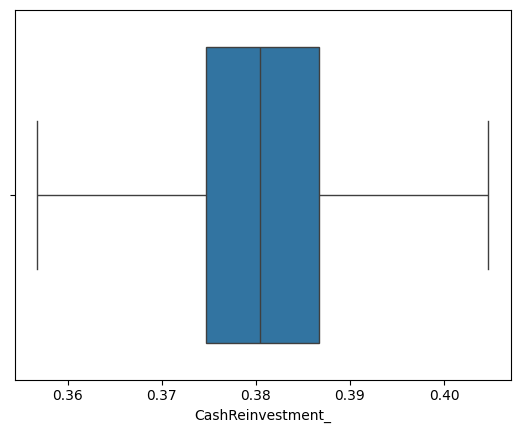

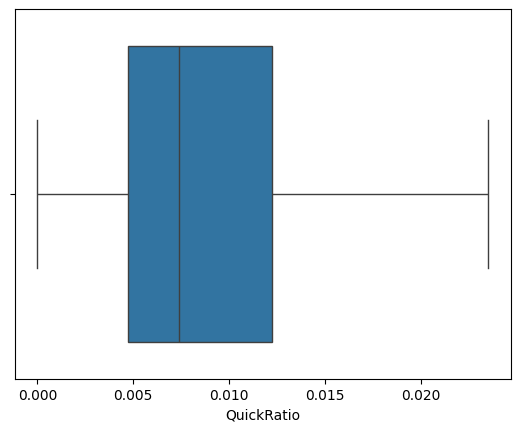

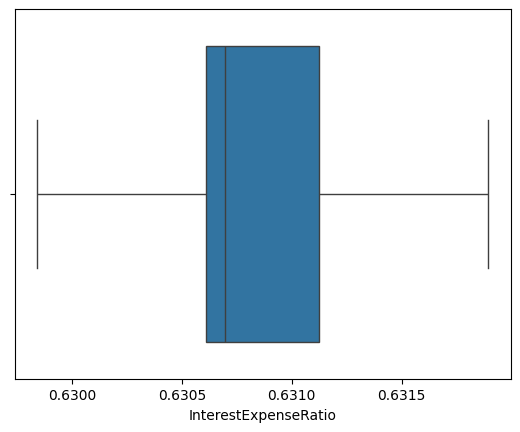

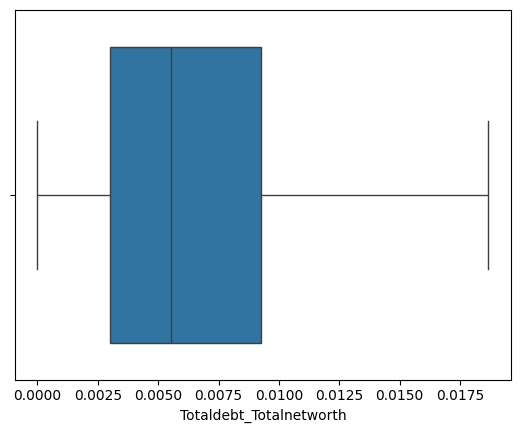

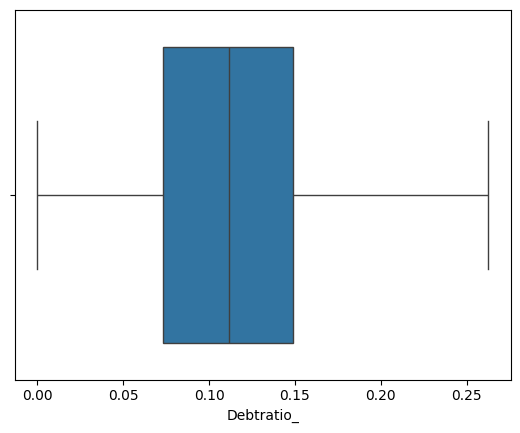

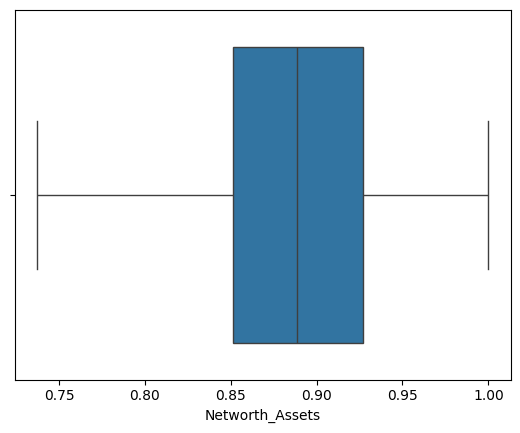

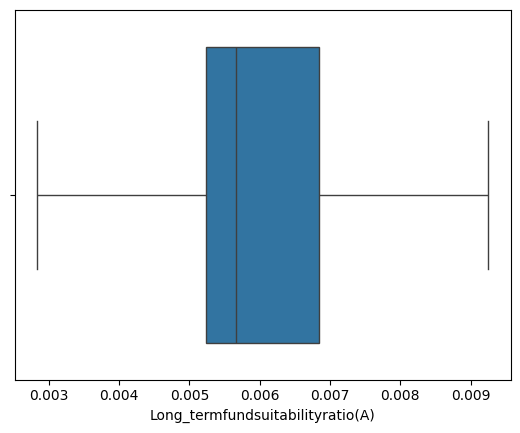

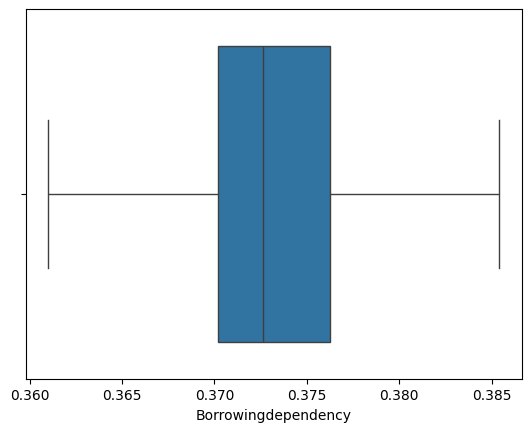

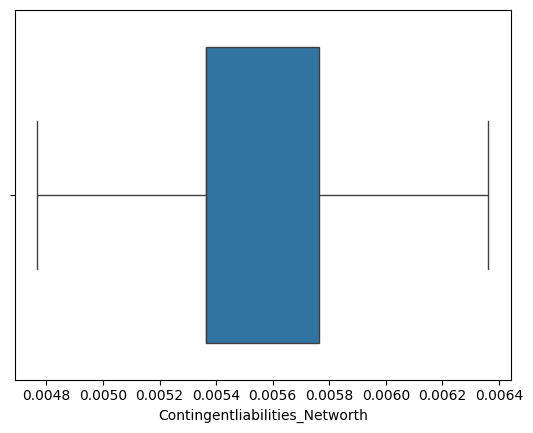

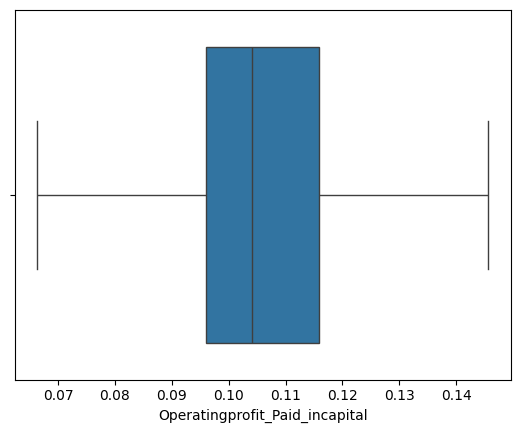

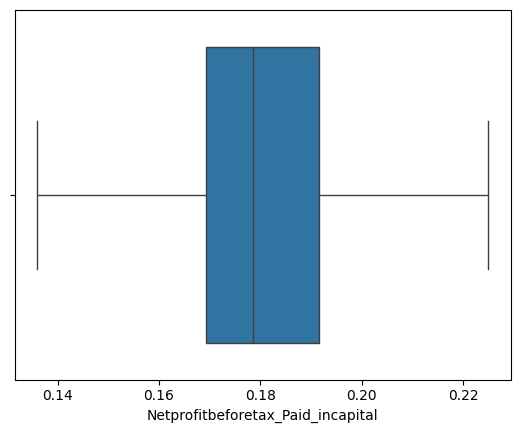

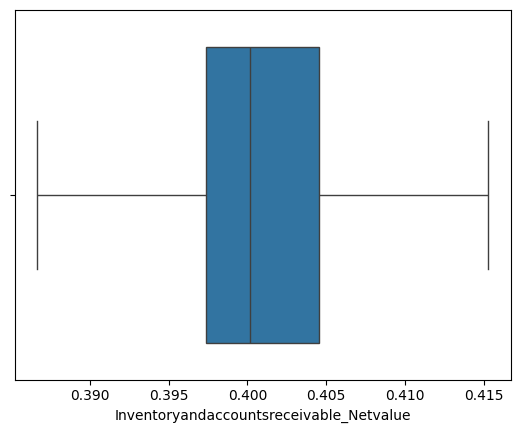

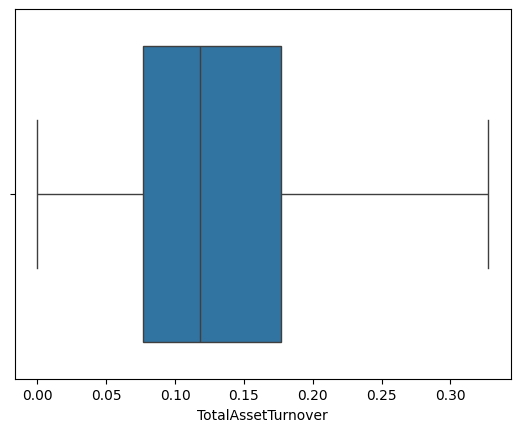

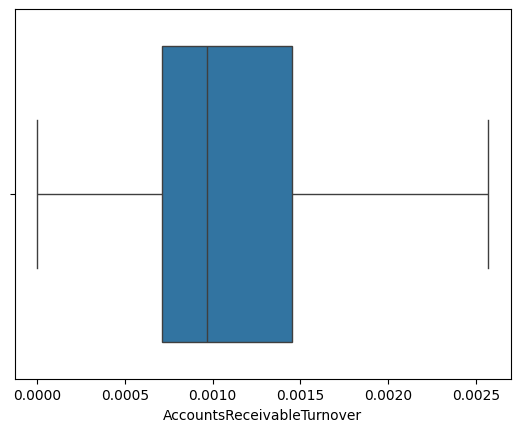

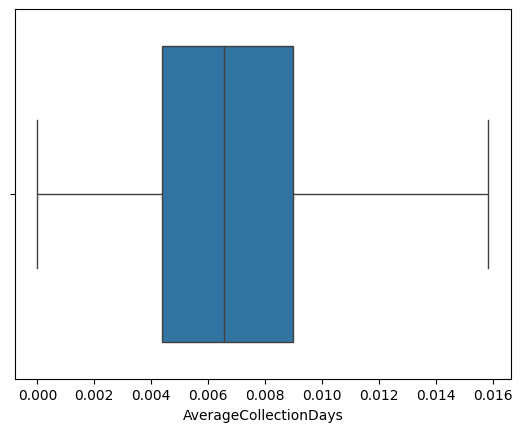

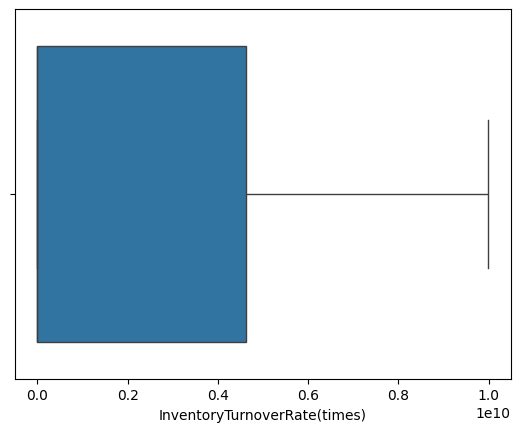

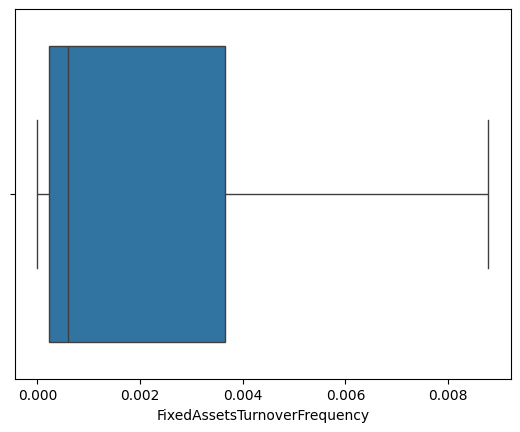

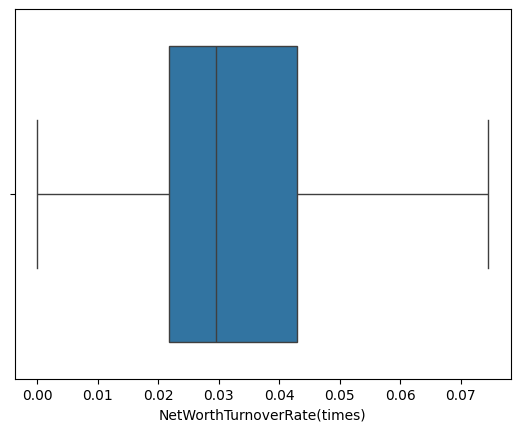

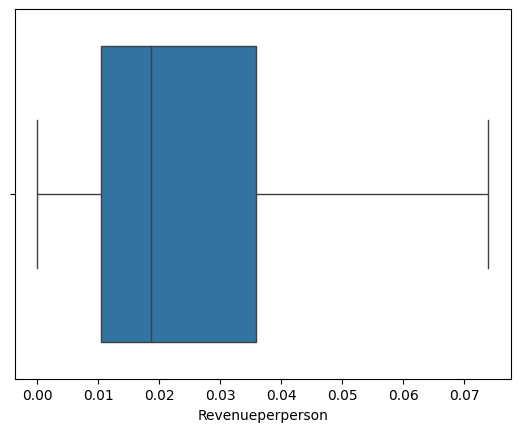

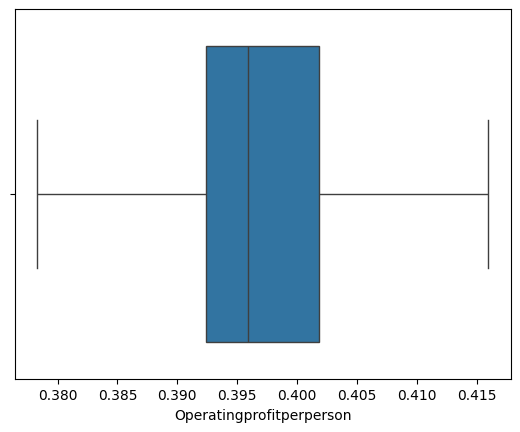

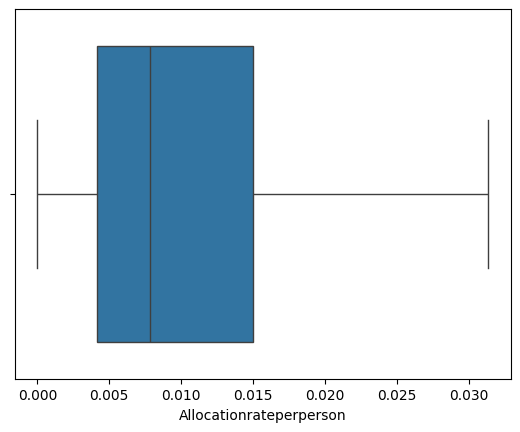

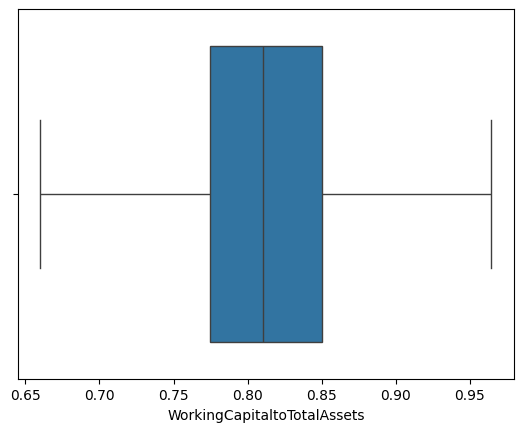

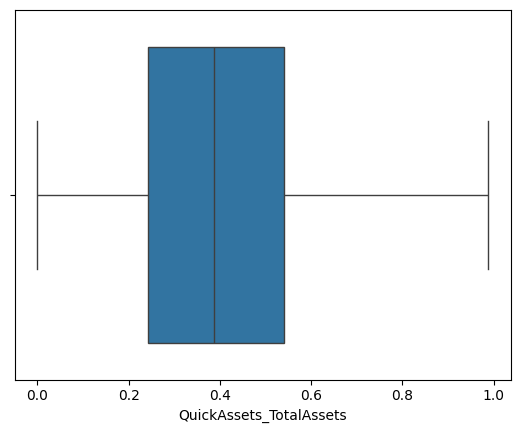

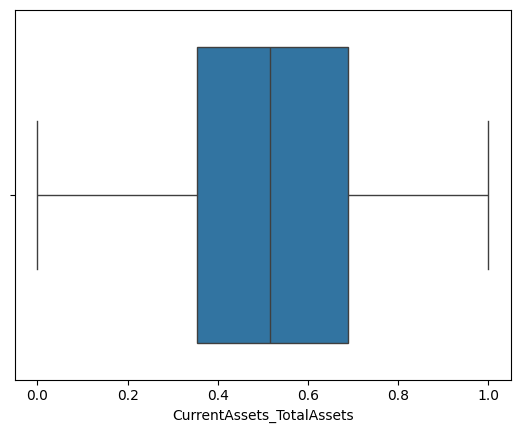

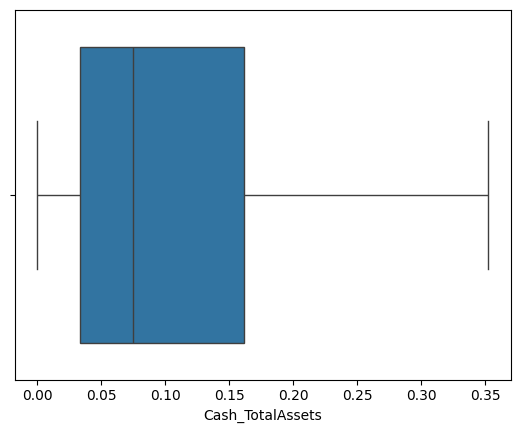

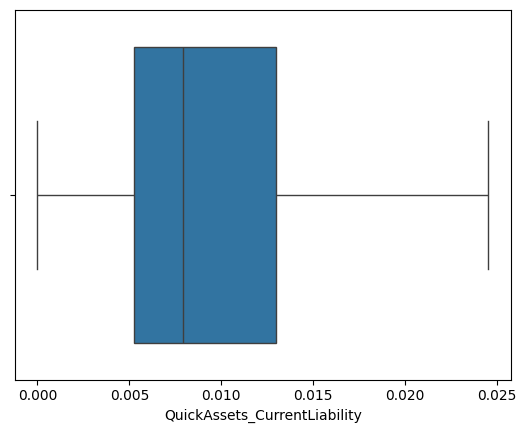

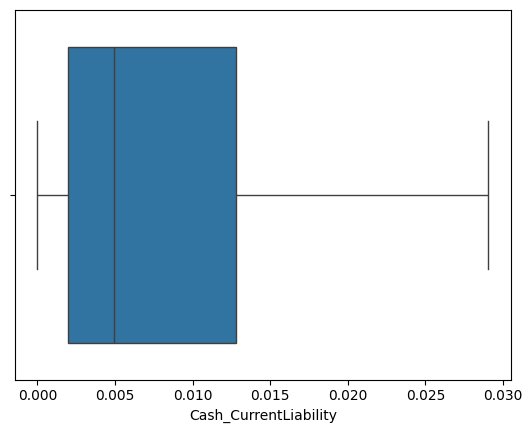

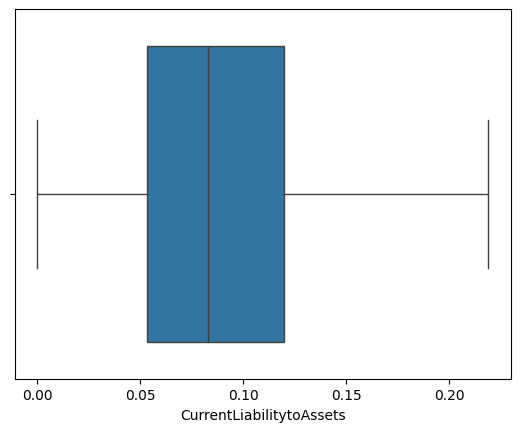

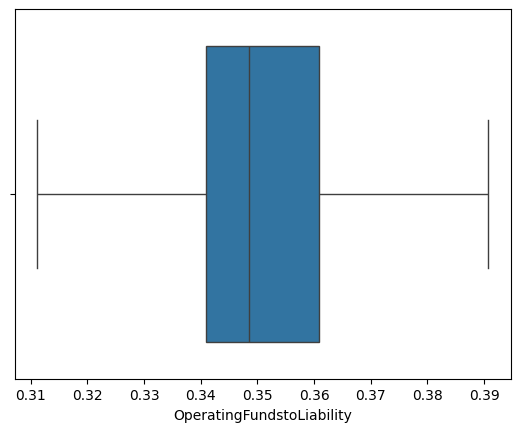

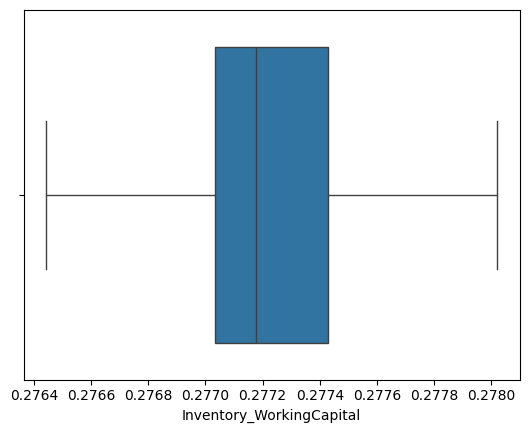

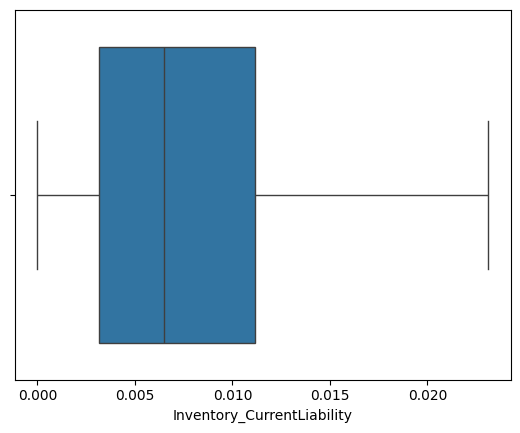

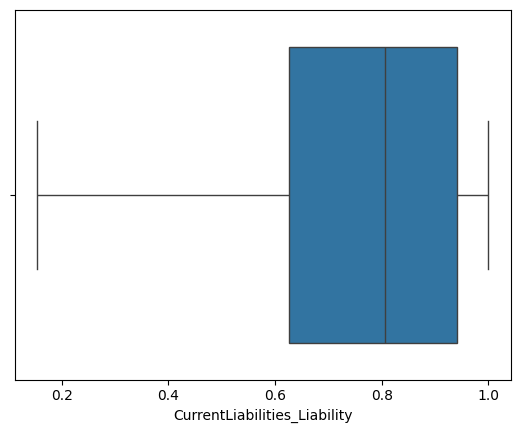

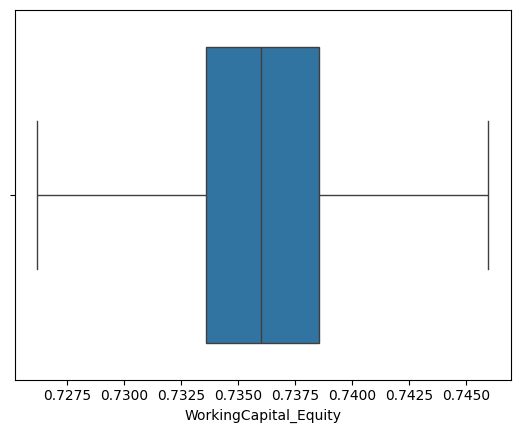

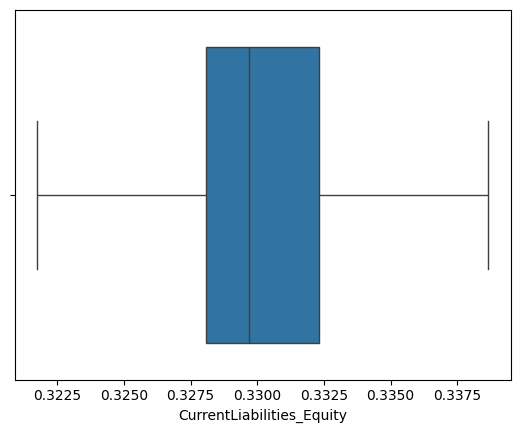

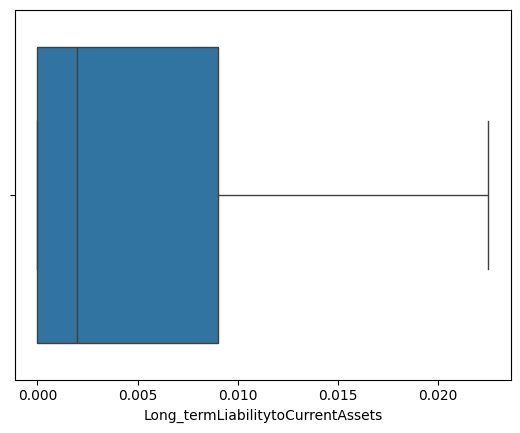

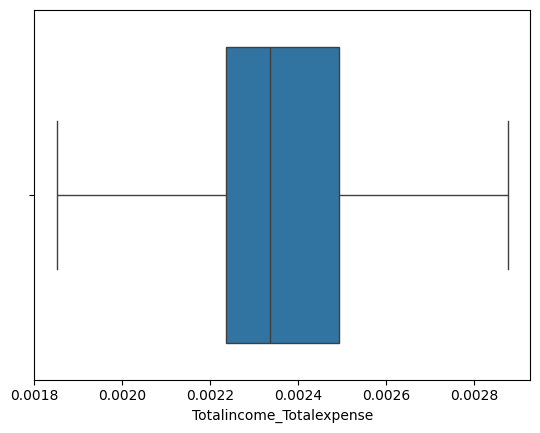

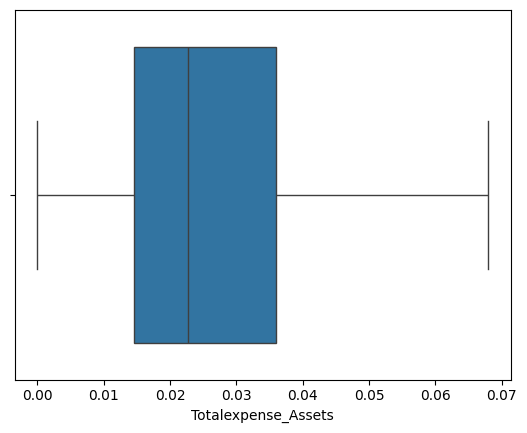

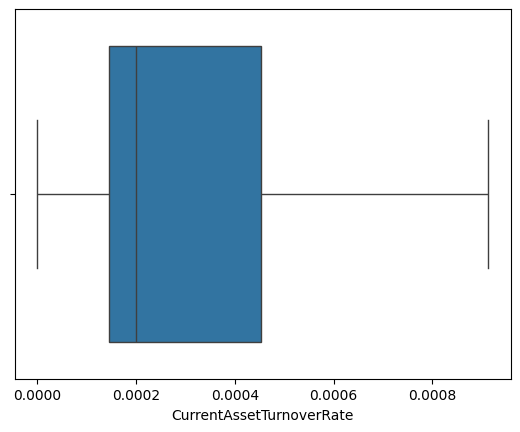

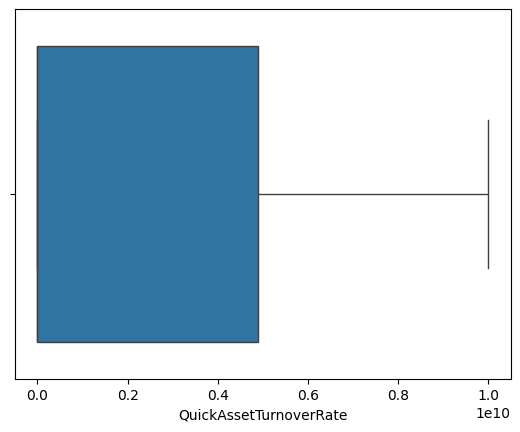

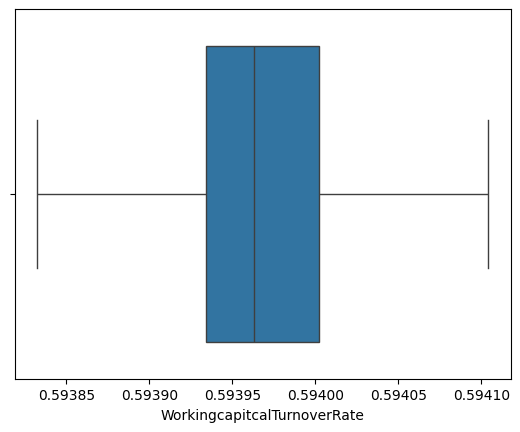

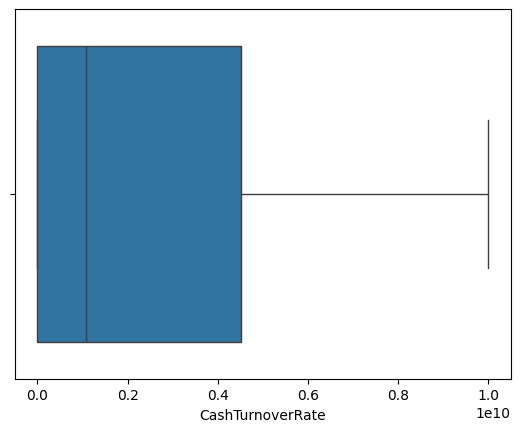

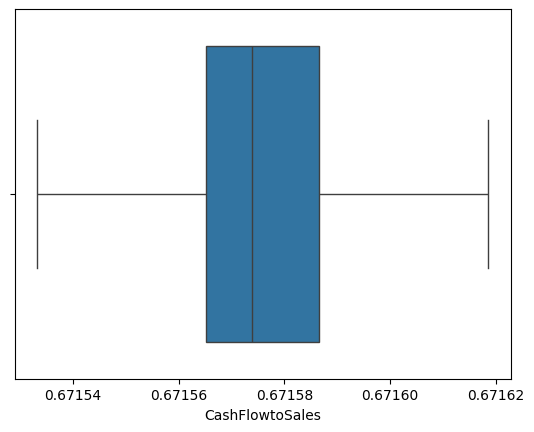

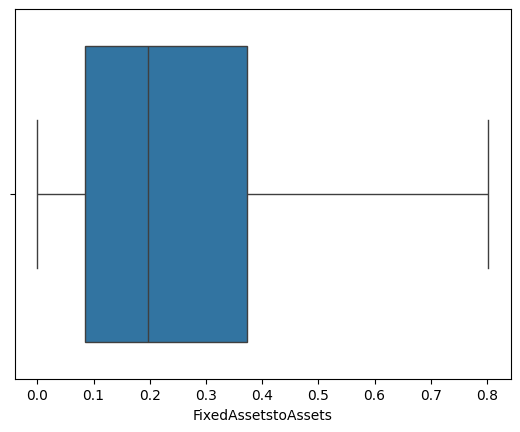

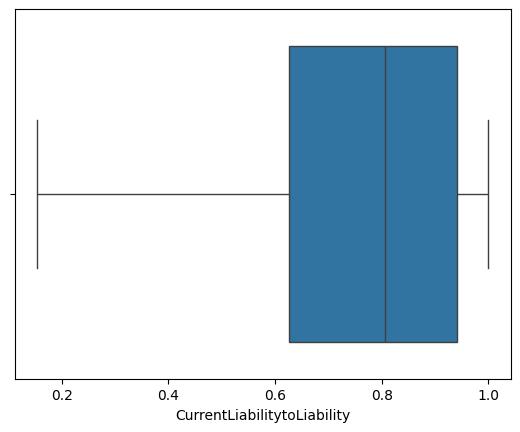

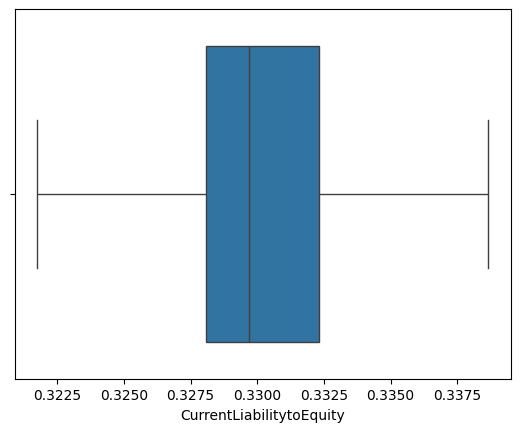

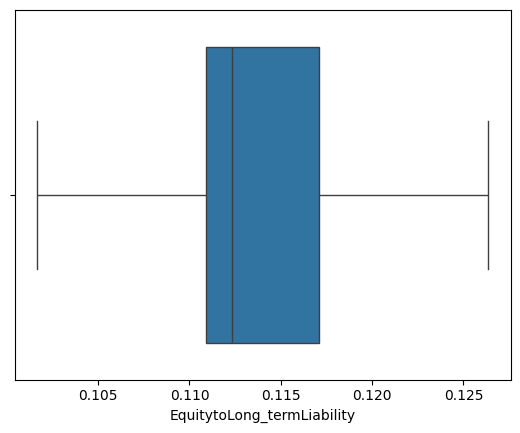

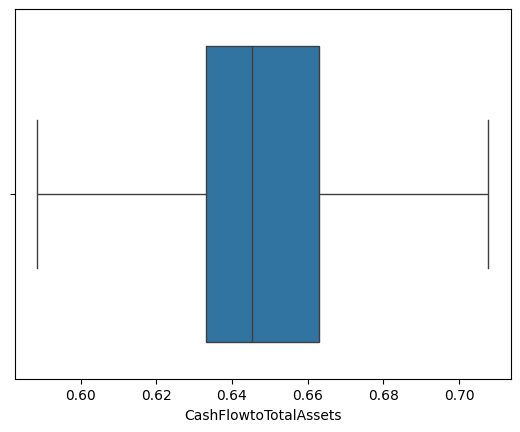

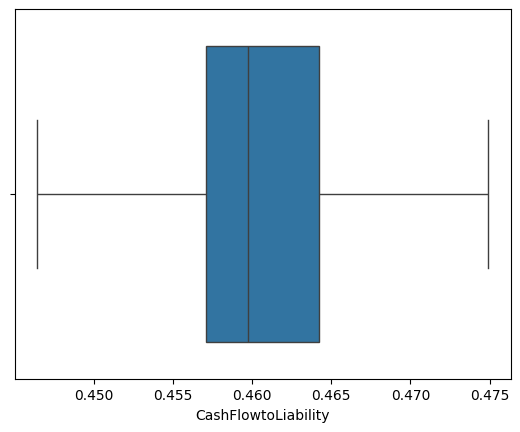

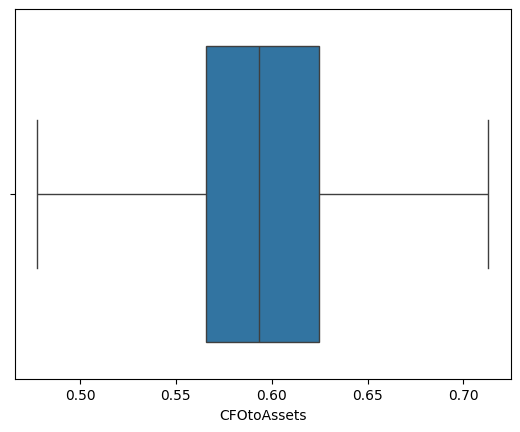

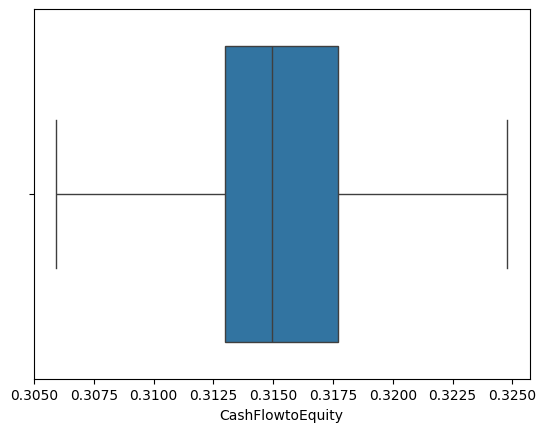

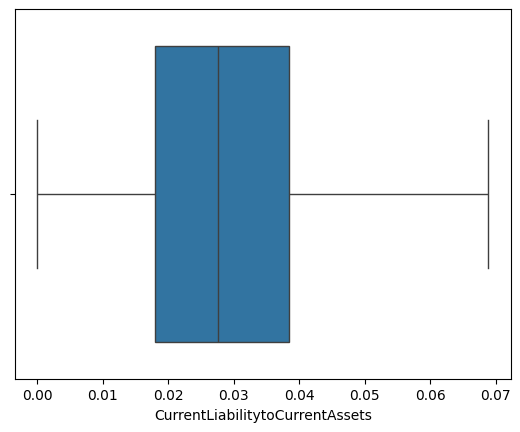

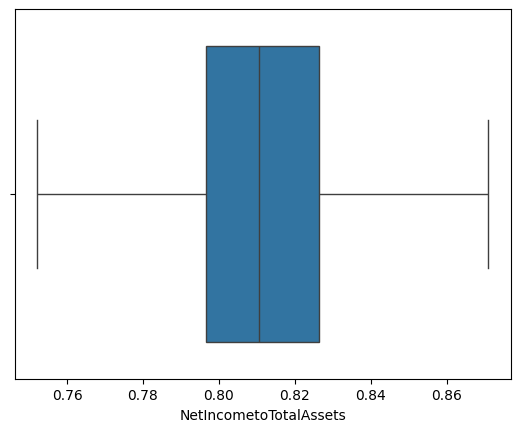

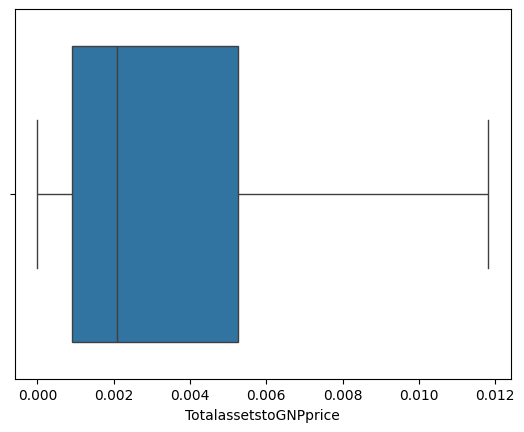

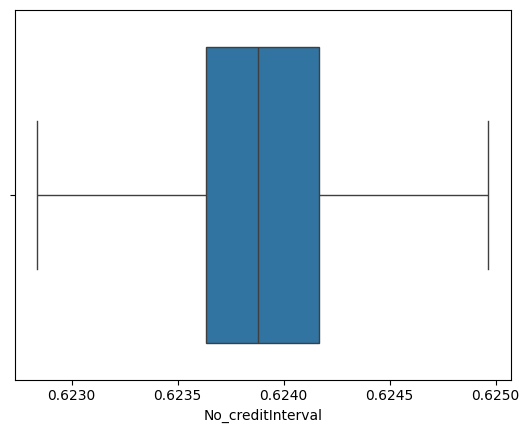

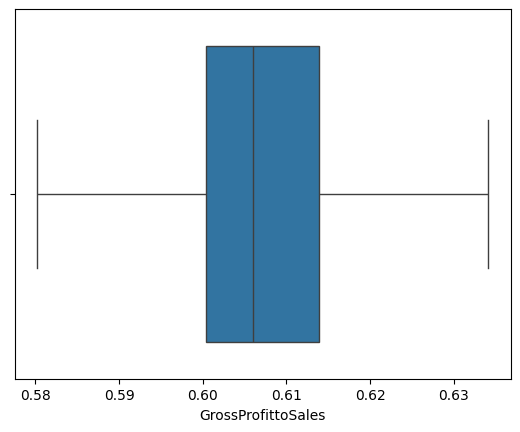

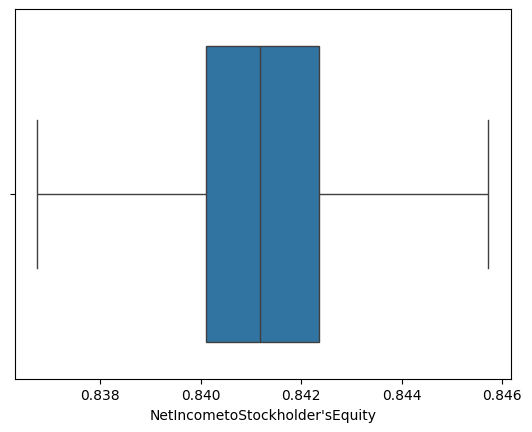

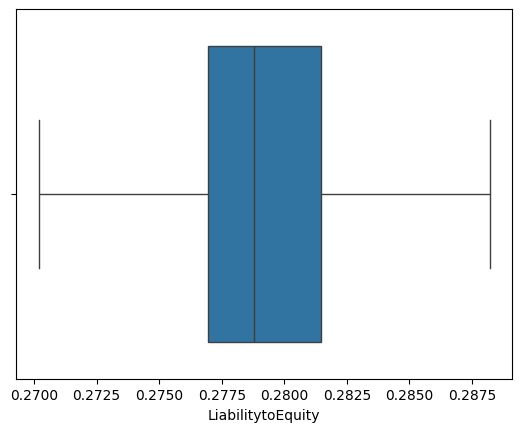

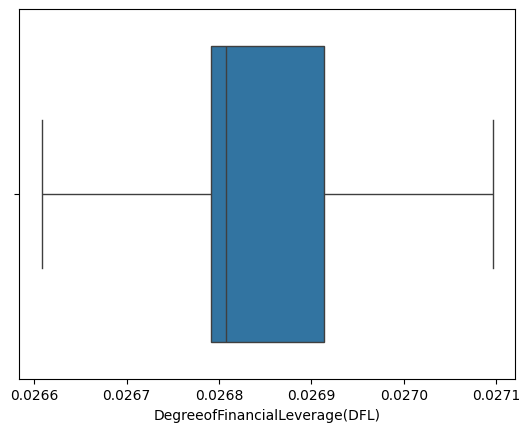

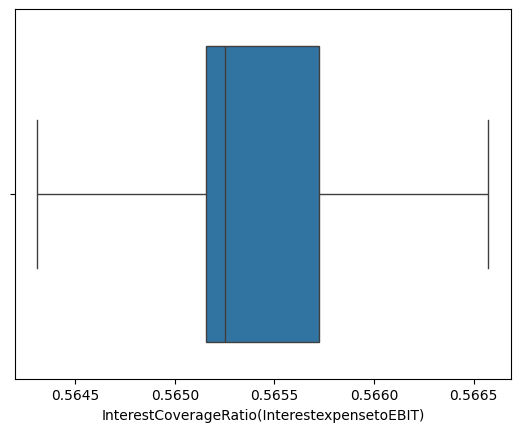

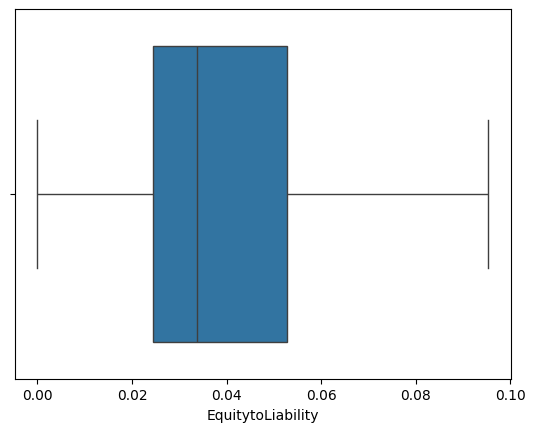

In [93]:
plot_count=0
for col in df1.columns:
    sns.boxplot(x=df1[col])
    plt.show()
    plot_count+=1
# Boxplot the columns whoes outlier are removed

In [146]:
df.describe()

Bankrupt  ROA(C)beforeinterestanddepreciationbeforeinterest  \
count  6819.000000                                        6819.000000   
mean      0.032263                                           0.505180   
std       0.176710                                           0.060686   
min       0.000000                                           0.000000   
25%       0.000000                                           0.476527   
50%       0.000000                                           0.502706   
75%       0.000000                                           0.535563   
max       1.000000                                           1.000000   

       ROA(A)beforeinterestand_aftertax  \
count                       6819.000000   
mean                           0.558625   
std                            0.065620   
min                            0.000000   
25%                            0.535543   
50%                            0.559802   
75%                            0.589157   
max                            1.000000   

       ROA(B)beforeinterestanddepreciationaftertax  OperatingGrossMargin  \
count                                  6819.000000           6819.000000   
mean                                      0.553589              0.607948   
std                                       0.061595              0.016934   
min                                       0.000000              0.000000   
25%                                       0.527277              0.600445   
50%                                       0.552278              0.605997   
75%                                       0.584105              0.613914   
max                                       1.000000              1.000000   

       RealizedSalesGrossMargin  OperatingProfitRate  Pre_taxnetInterestRate  \
count               6819.000000          6819.000000             6819.000000   
mean                   0.607929             0.998755                0.797190   
std                    0.016916             0.013010                0.012869   
min                    0.000000             0.000000                0.000000   
25%                    0.600434             0.998969                0.797386   
50%                    0.605976             0.999022                0.797464   
75%                    0.613842             0.999095                0.797579   
max                    1.000000             1.000000                1.000000   

       After_taxnetInterestRate  Non_industryincomeandexpenditure_revenue  \
count               6819.000000                               6819.000000   
mean                   0.809084                                  0.303623   
std                    0.013601                                  0.011163   
min                    0.000000                                  0.000000   
25%                    0.809312                                  0.303466   
50%                    0.809375                                  0.303525   
75%                    0.809469                                  0.303585   
max                    1.000000                                  1.000000   

       Continuousinterestrate(aftertax)  OperatingExpenseRate  \
count                       6819.000000          6.819000e+03   
mean                           0.781381          1.995347e+09   
std                            0.012679          3.237684e+09   
min                            0.000000          0.000000e+00   
25%                            0.781567          1.566874e-04   
50%                            0.781635          2.777589e-04   
75%                            0.781735          4.145000e+09   
max                            1.000000          9.990000e+09   

       Researchanddevelopmentexpenserate  Cashflowrate  \
count                       6.819000e+03   6819.000000   
mean                        1.950427e+09      0.467431   
std                         2.598292e+09      0.017036   
min                         0.000000e+00      

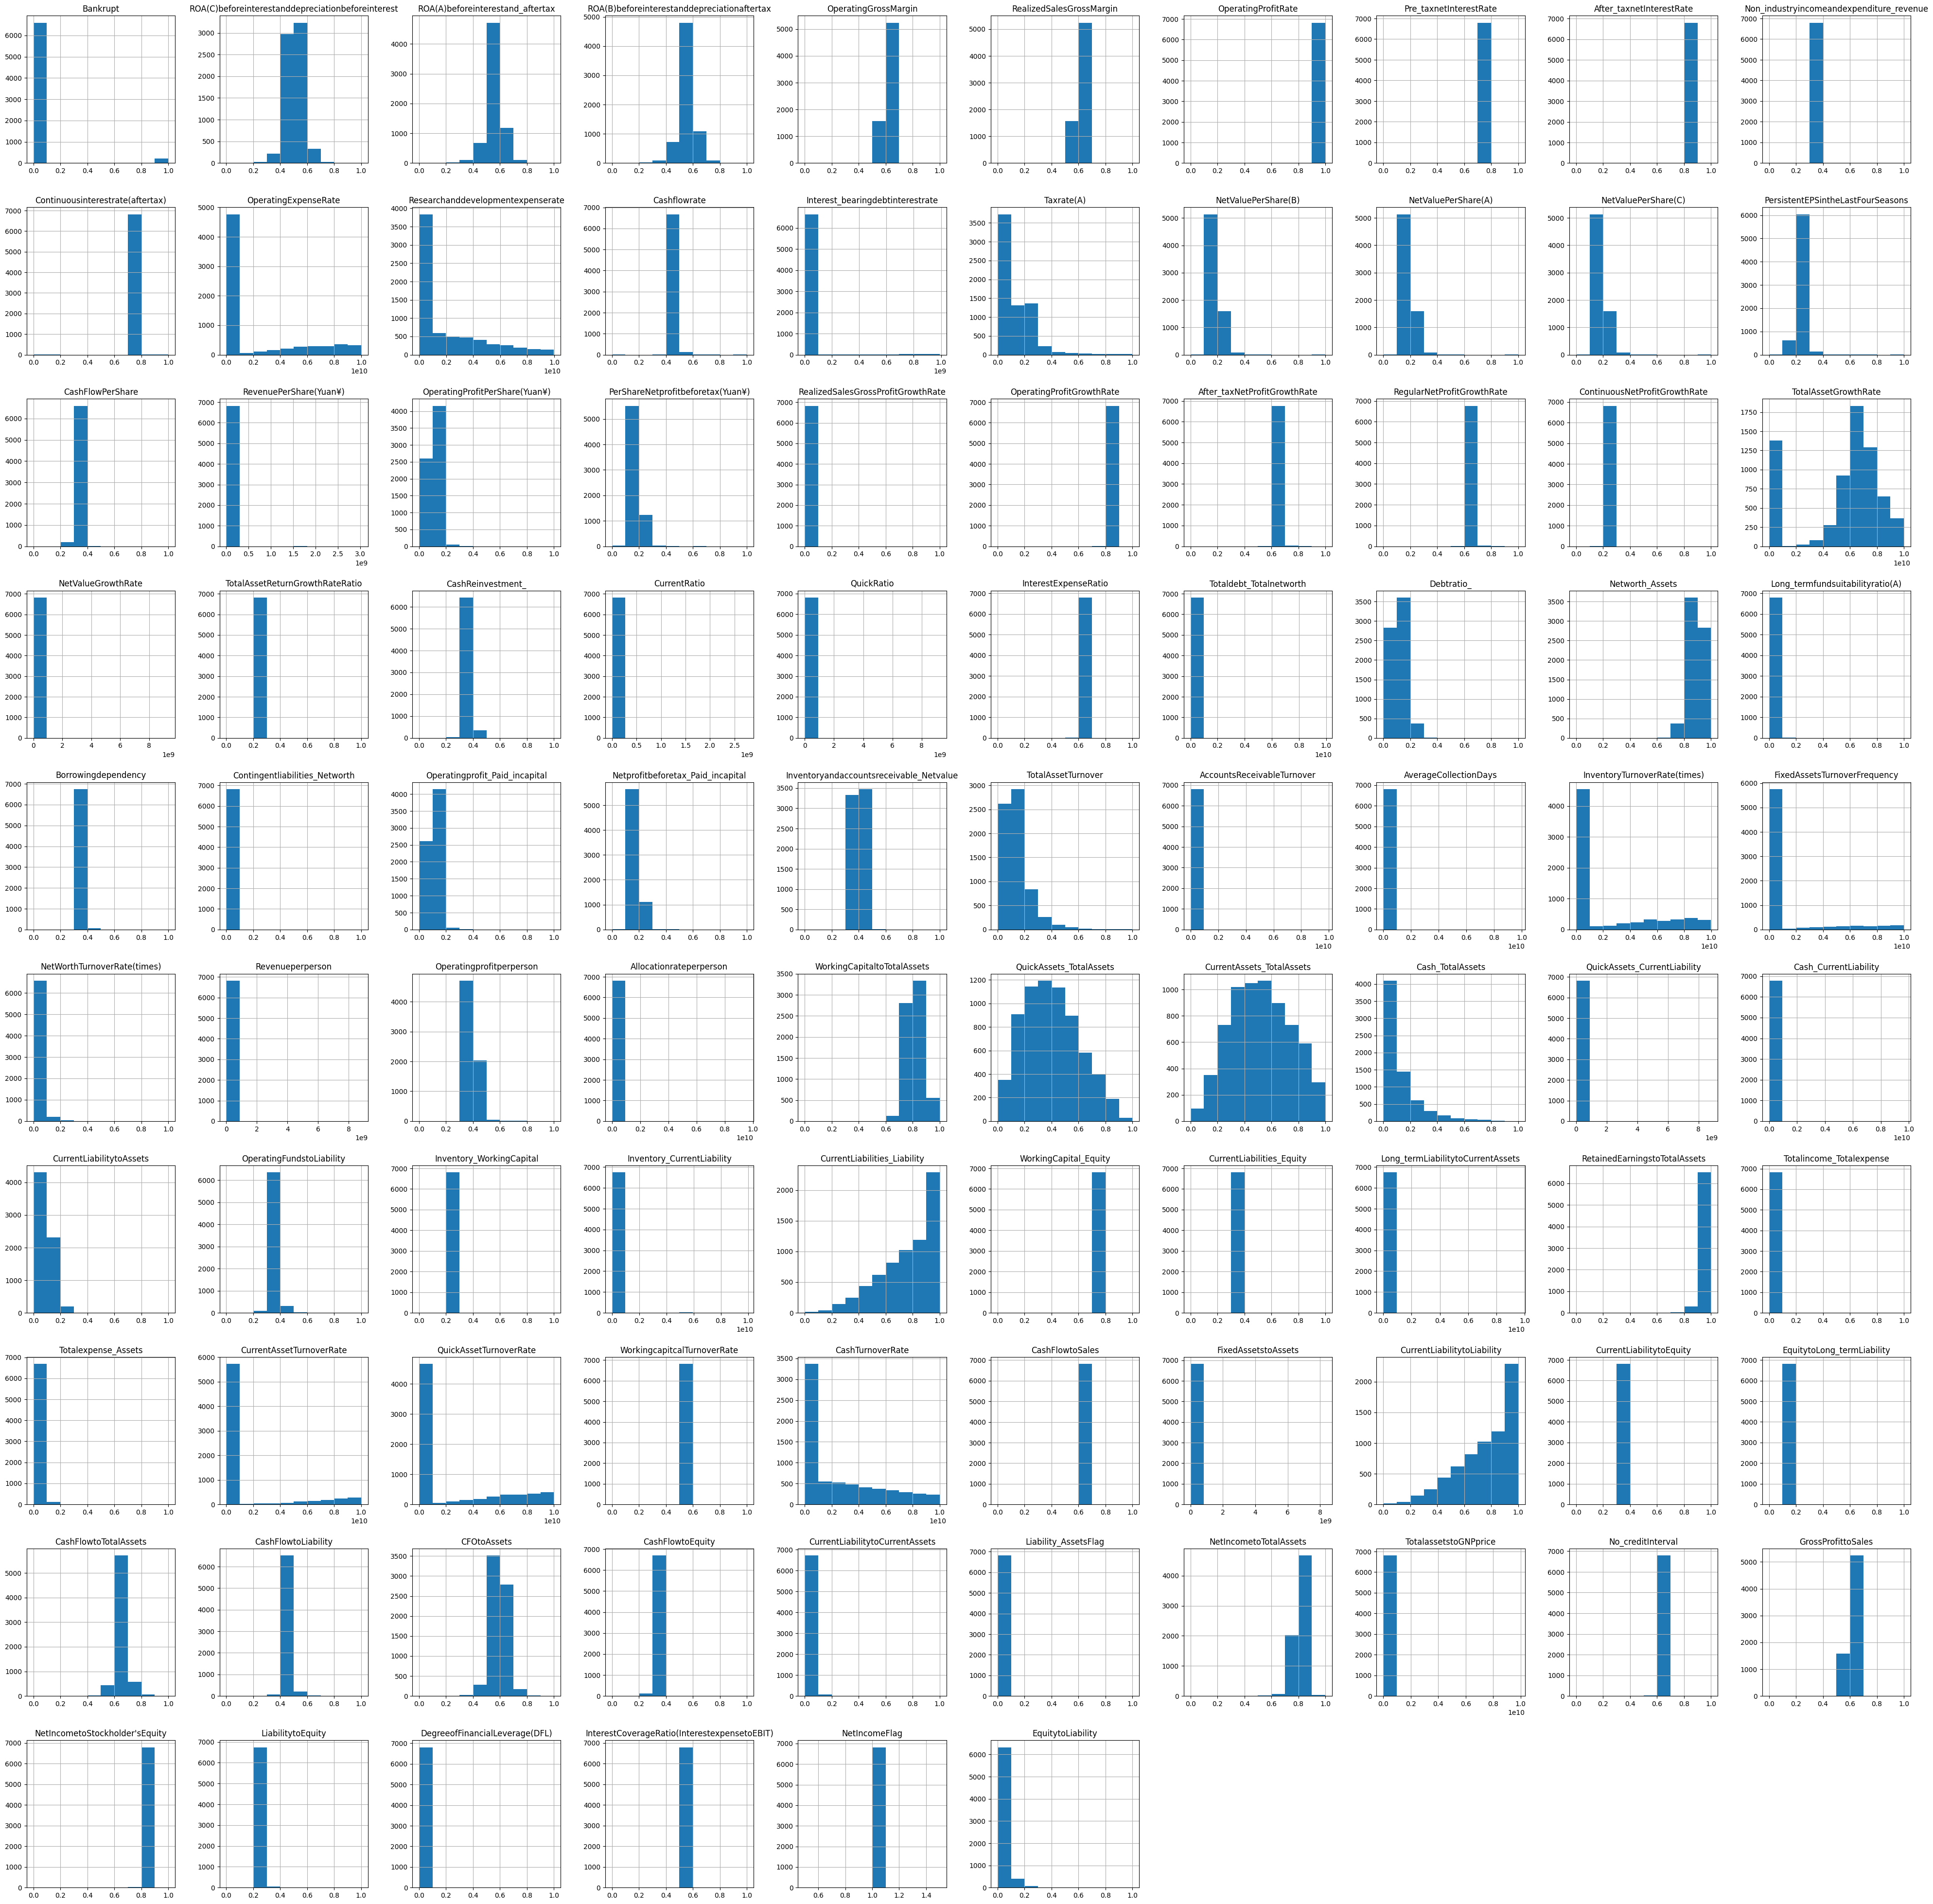

In [147]:
# histogram of all columns are present in dataset
df.hist(figsize=(50,50))
plt.show()

In [ ]:
# Conclusion:

# 1.   df has 6819 records & 96 columns. Columns includes financial attributes and their bankruptcy status in Bankrupt.
# 2.   LDatatype are float64 or int64.
# 3.   There is no null or duplicated values.

# Detect and handle outliers.

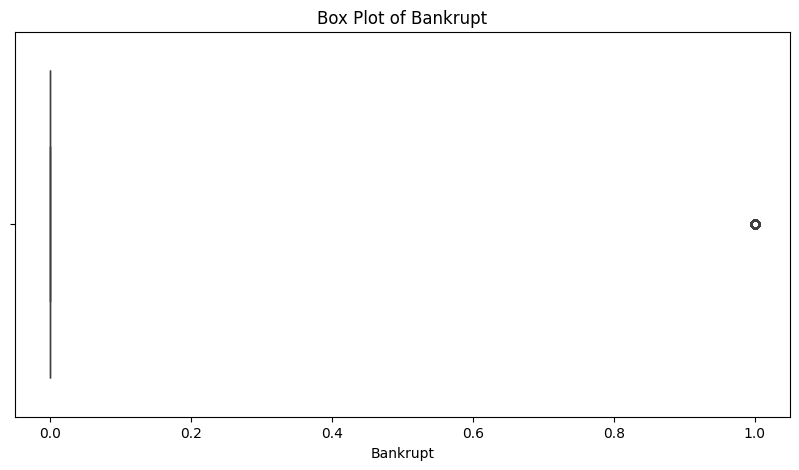

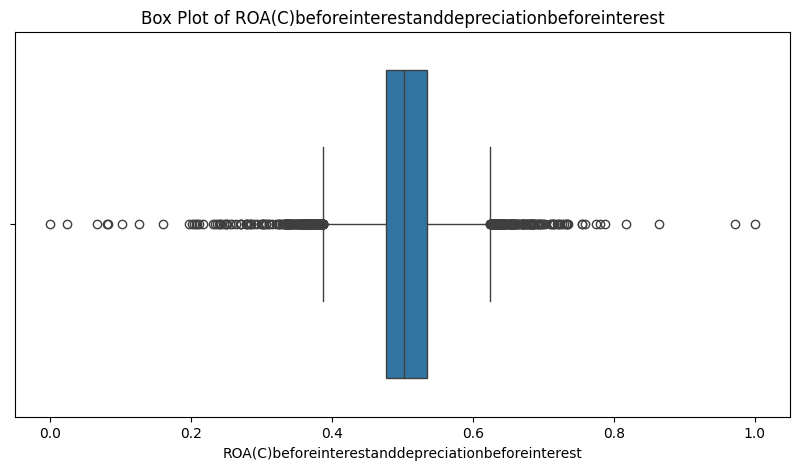

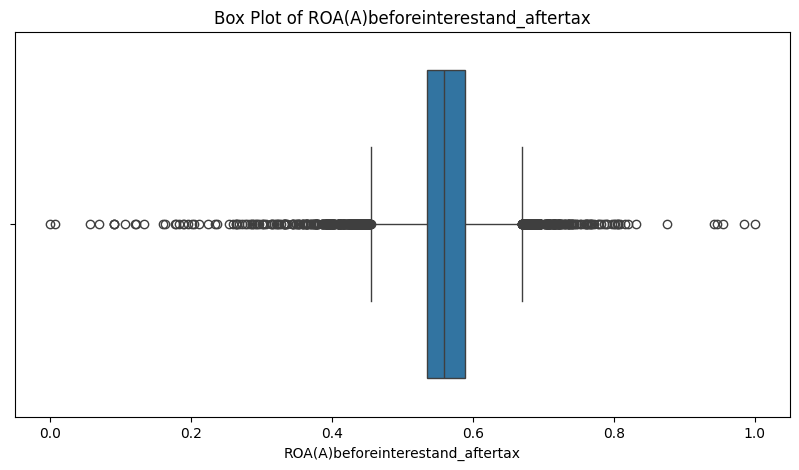

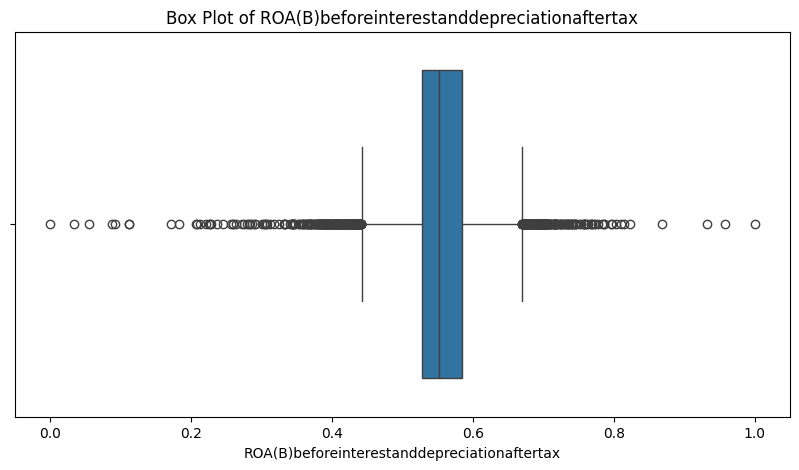

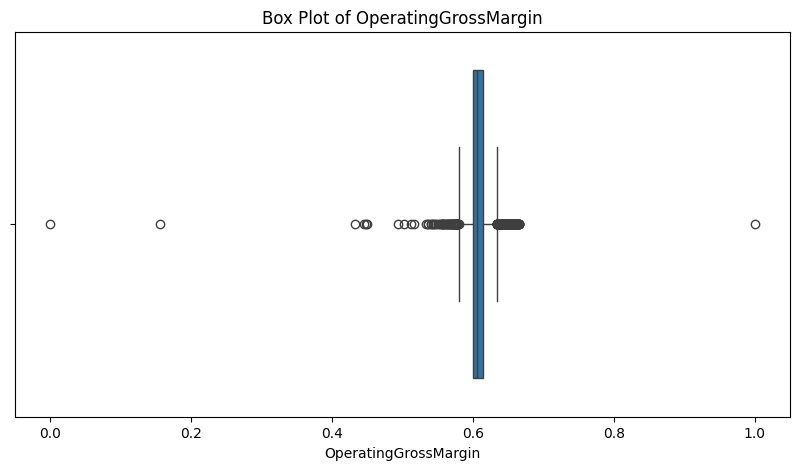

In [167]:
# The plot is showing Outliers of all columns
# Detect outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Visualize outliers for a few selected features using box plots
selected_features = df.columns[:5] 
for i in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[i])
    plt.title(f'Box Plot of {i}')
    plt.show()

C:\Users\Bharat\AppData\Local\Temp\ipykernel_9112\4072389358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Bankrupt', data=df, palette=palette)


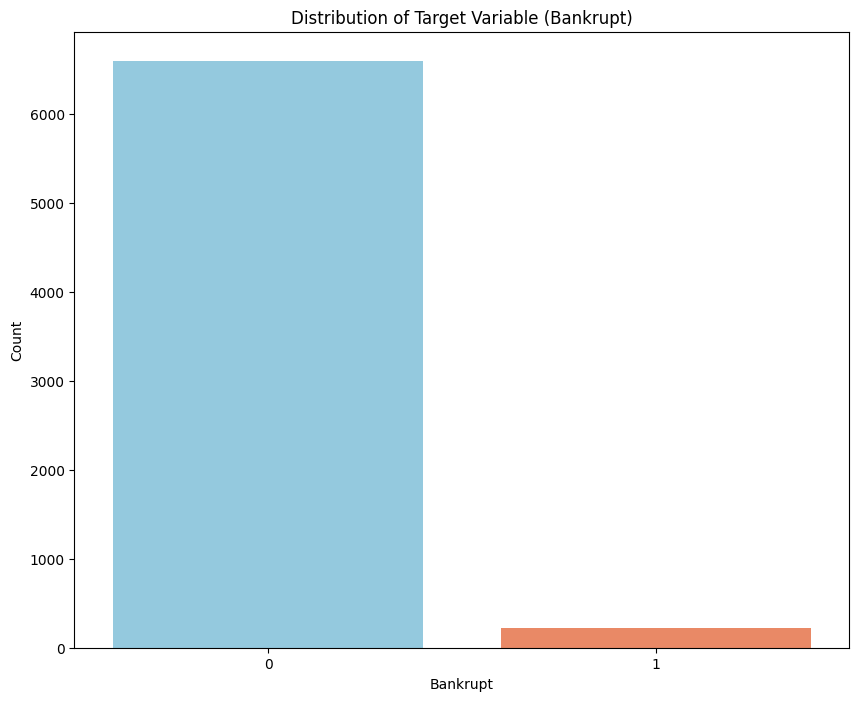

In [168]:
# Visualizing the distribution of the Target Variable
plt.figure(figsize=(10, 8))
palette = ["skyblue", "coral"]
sns.countplot(x='Bankrupt', data=df, palette=palette)
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Bankrupt)')
plt.show()

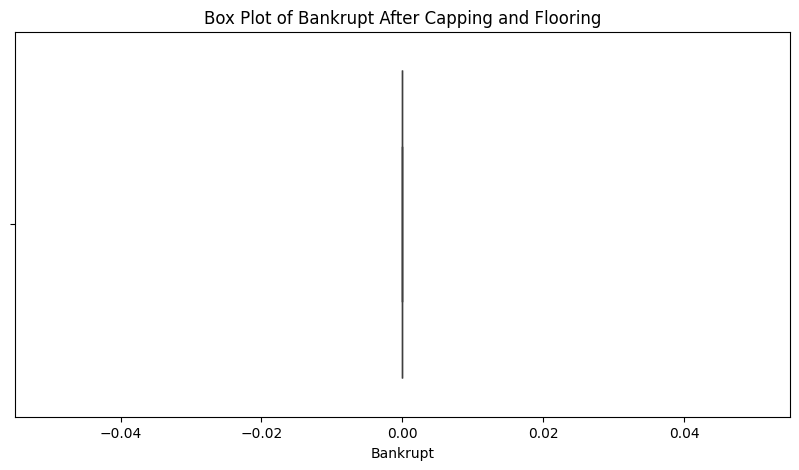

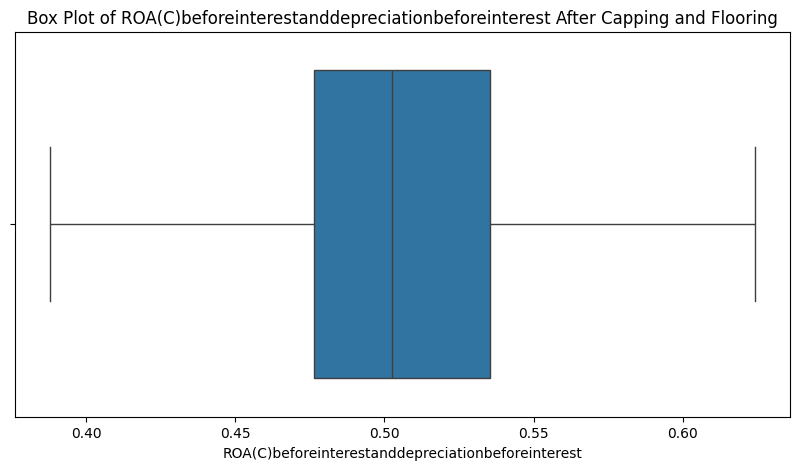

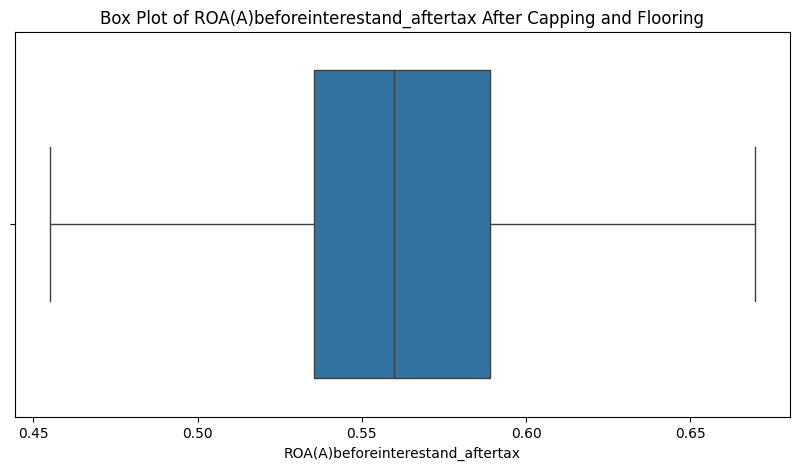

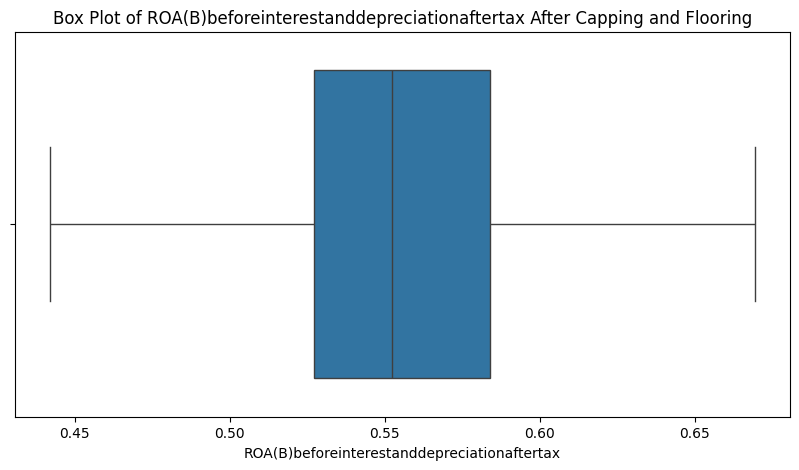

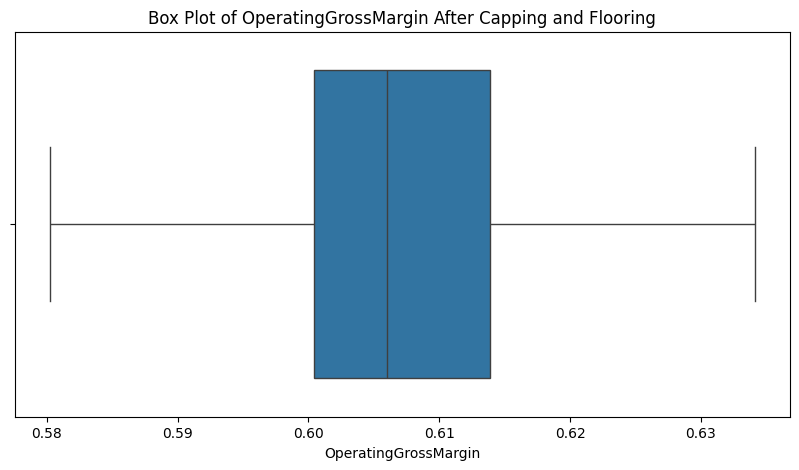

In [169]:
# It is showing without outliers
for column in df.columns:
    if df[column].dtype != 'object' and column != 'Bankrupt?':
        df[column] = np.where(df[column] > upper_bound[column], upper_bound[column], df[column])
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column], df[column])

# Verify that outliers have been capped and floored
for feature in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} After Capping and Flooring')
    plt.show()

# Exploratory Data Analysis (EDA):

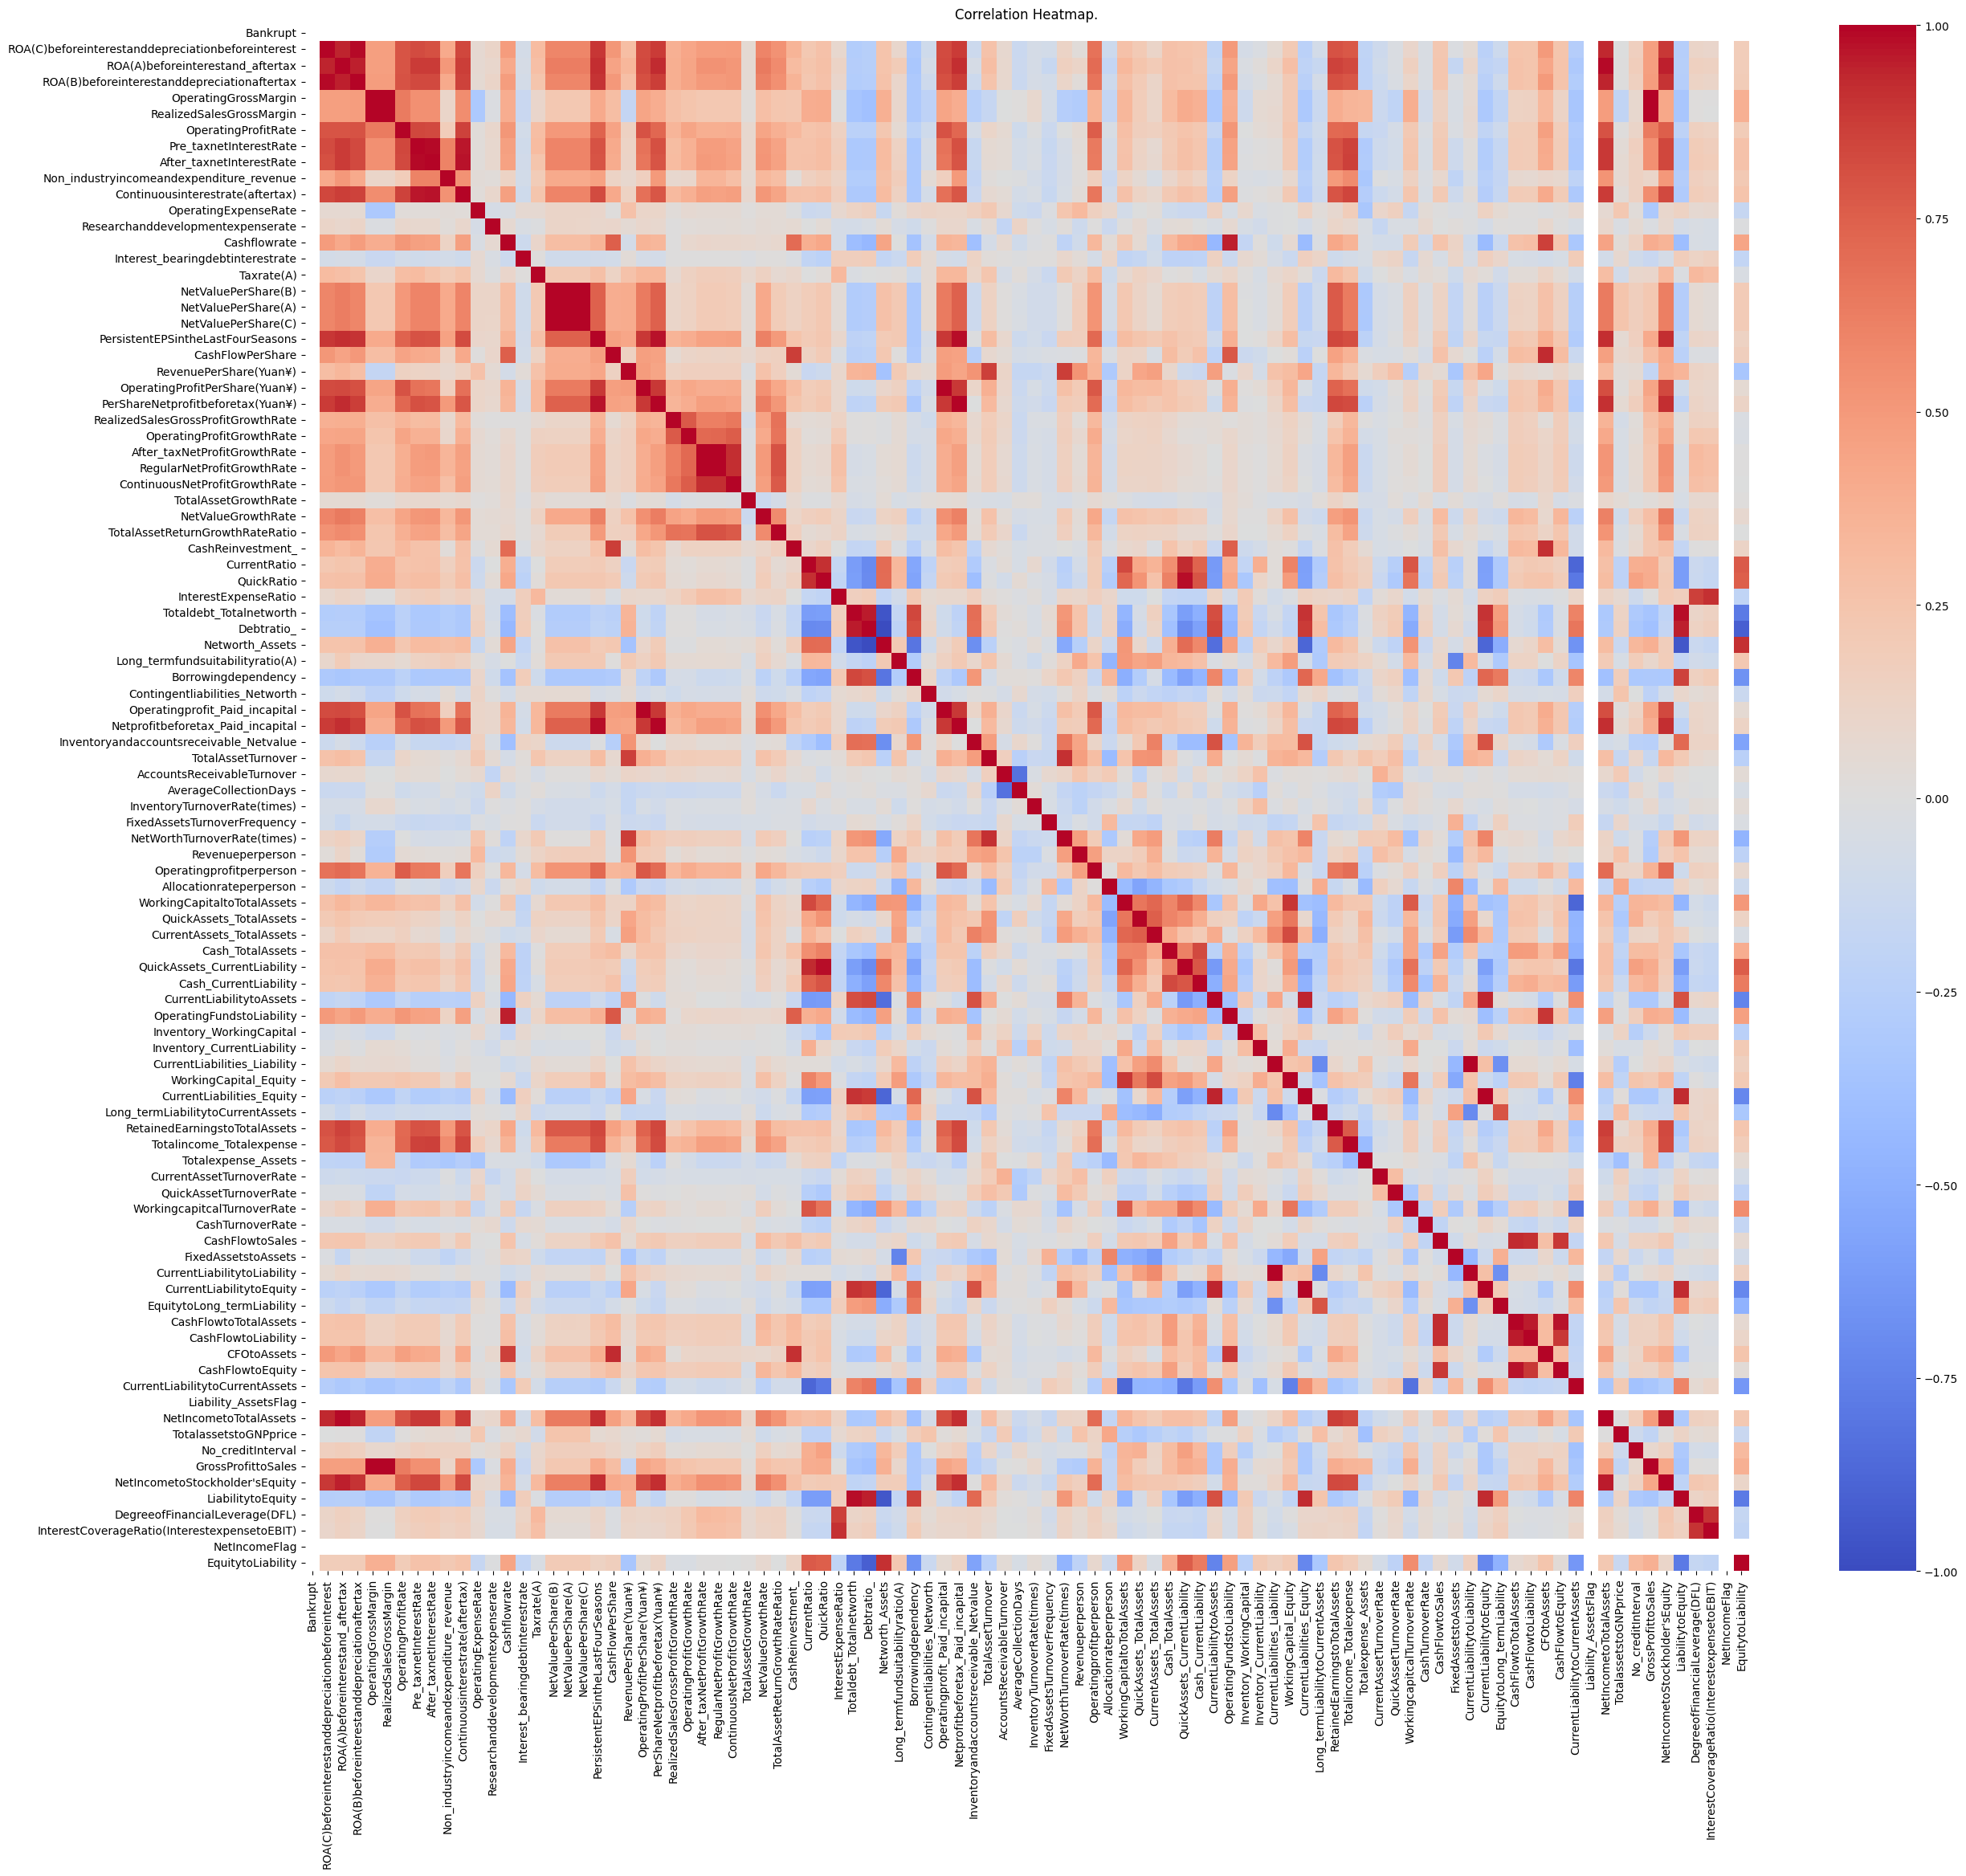

In [170]:
# Check corelations between various features of df using heatmap

# Createing correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(29, 25))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Correlation Heatmap.")
plt.show()

In [ ]:
'''
Analysis:
- There are several features that have a strong positive correlation with the target variable "Bankrupt". These include:
    - Net Income to Total Assets
    - Total Debt to Total Assets
    - Debt to Equity
    - Interest Expense to Total Assets
    - Sales to Total Assets
    - Current Assets to Total Assets
    - Inventory to Total Assets
- There are also several features that have a strong negative correlation with the target variable "Bankrupt". These include:
    - Return on Assets
    - Return on Equity
    - Gross Profit Margin
    - Operating Profit Margin
    - Net Profit Margin
    - Quick Ratio
    - Current Ratio
- The heatmap also reveals that there are several features that are highly correlated with each other. For example:
    - Total Debt to Total Assets and Debt to Equity
    - Sales to Total Assets and Current Assets to Total Assets
    - Inventory to Total Assets and Current Assets to Total Assets
    
Insights:

- The heatmap provides valuable insights into the relationships between the different features in the dataset. This information can be used to:
    - Identify potential risk factors for bankruptcy.
    - Develop early warning systems for bankruptcy.
    - Improve the accuracy of predictive models for bankruptcy.
'''

# EDA as per Target Variable -> Bankrupt

In [171]:
df["Bankrupt"].value_counts(normalize=True)

Bankrupt
0.0    1.0
Name: proportion, dtype: float64

In [172]:
# Set benchmark for features correlation significance with target
corr_features = corr_matrix["Bankrupt"].abs() >= 0.15
corr_features.value_counts()
    ## True -> Significant
    ## False -> Not significant

Bankrupt
False    96
Name: count, dtype: int64

# Identification of features (variables) in the dataset have a significant correlation with the target variable Bankrupt?.


In [85]:
df['Bankrupt'].value_counts()
    ## 0 -> Not Bankrupt
    ## 1 -> Bankrupt

Bankrupt
0    6599
1     220
Name: count, dtype: int64

In [83]:
# Get list of names for features passing the benchmark
feature_names = list(corr_features[corr_features].index)
feature_names

['Bankrupt',
 'ROA(C)beforeinterestanddepreciationbeforeinterest',
 'ROA(A)beforeinterestand_aftertax',
 'ROA(B)beforeinterestanddepreciationaftertax',
 'NetValuePerShare(B)',
 'NetValuePerShare(A)',
 'NetValuePerShare(C)',
 'PersistentEPSintheLastFourSeasons',
 'PerShareNetprofitbeforetax(Yuan¥)',
 'Debtratio_',
 'Networth_Assets',
 'Borrowingdependency',
 'Netprofitbeforetax_Paid_incapital',
 'WorkingCapitaltoTotalAssets',
 'CurrentLiabilitytoAssets',
 'CurrentLiabilities_Equity',
 'RetainedEarningstoTotalAssets',
 'CurrentLiabilitytoEquity',
 'CurrentLiabilitytoCurrentAssets',
 'NetIncometoTotalAssets',
 "NetIncometoStockholder'sEquity",
 'LiabilitytoEquity']

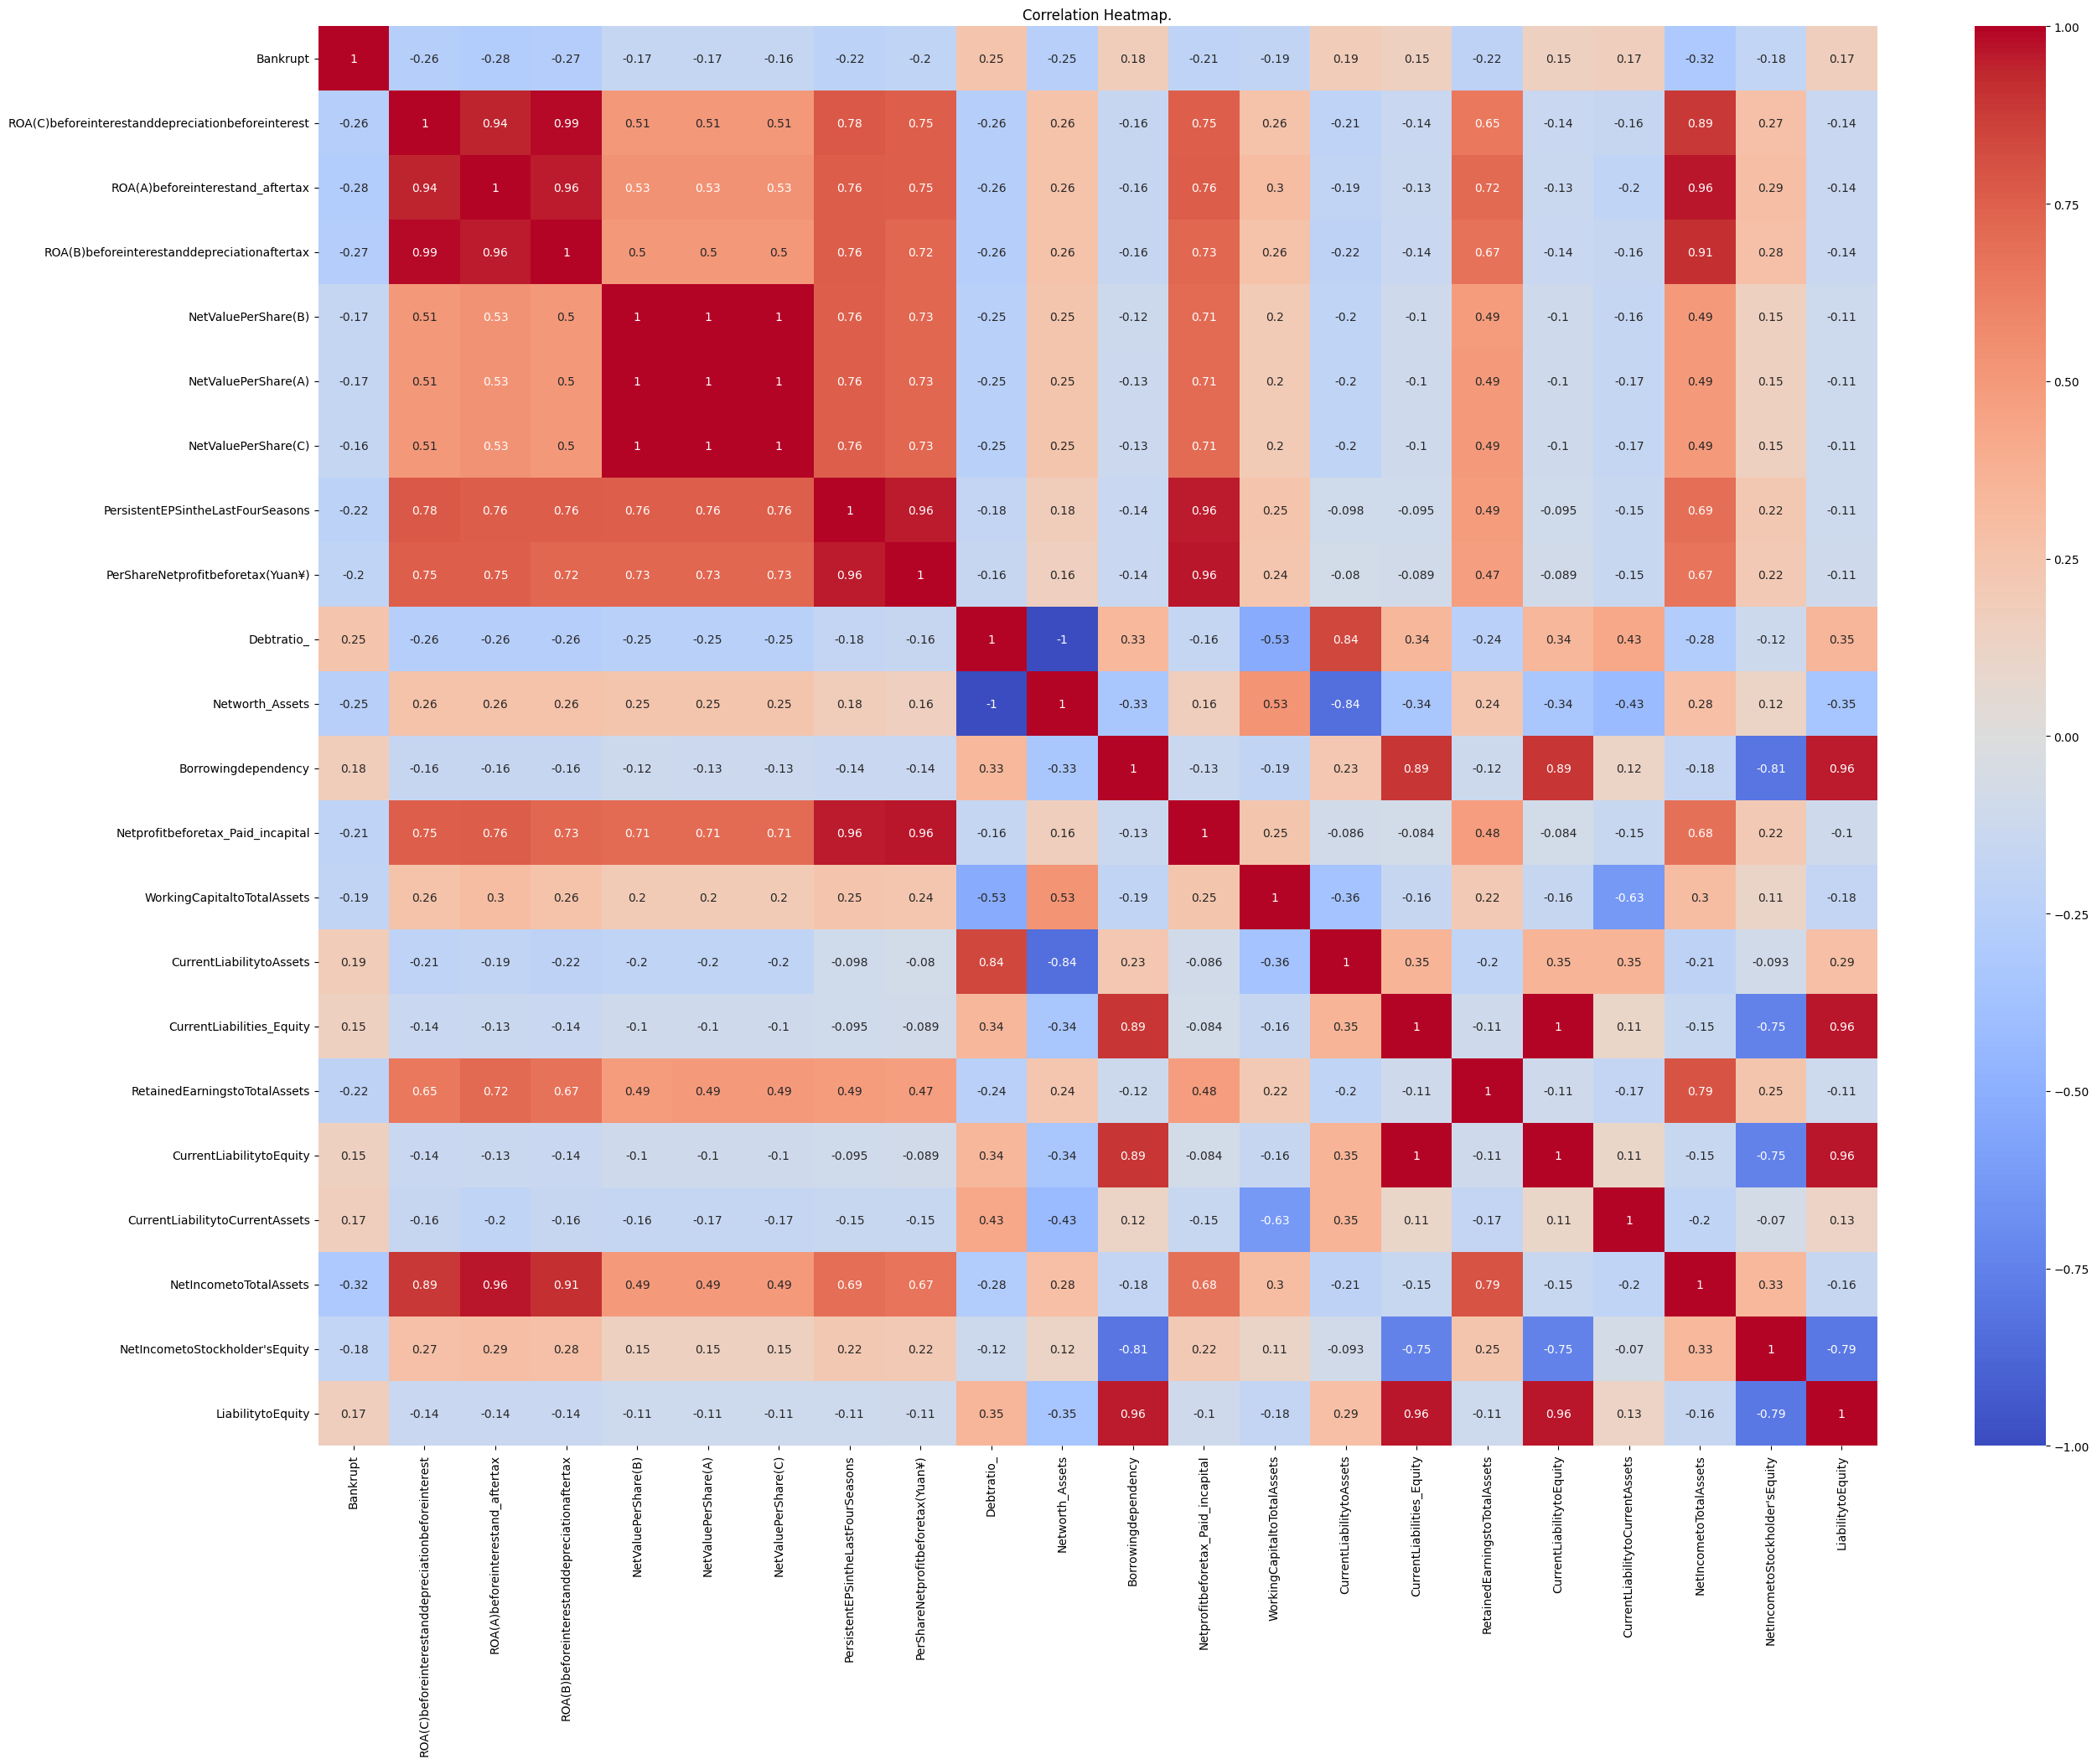

In [87]:
mini_corr_matrix = df[feature_names].corr()
# Generate the heatmap
plt.figure(figsize=(30, 22))
sns.heatmap(mini_corr_matrix, annot = True, cmap="coolwarm")
plt.title("Correlation Heatmap.")
plt.show()

In [ ]:
'''
As, 0.15 is the benchmark for correlation significance, so only 22 attributes have at least weak correlation with the target. The rest attributes have correlation with target less than the benchmark, which means they have too weak or even no relation with the target.
The choice based on correlation significance with the target only might not be the best choice. As correlation assumes linear relationship between features.
'''

# Hypothesis Testing


# t-test

In [123]:
# Seperate the data into Bankrupt and Non Bankrupt.
bankrupt = df[df['Bankrupt'] == 1]
non_bankrupt = df[df['Bankrupt'] == 0]

In [125]:
# Perform t-tests
p_values = {}
for column in df.columns:
    if column != 'Bankrupt':
        _, p_value = ttest_ind(bankrupt[column], non_bankrupt[column], equal_var=False)
        p_values[column] = p_value


C:\Users\Bharat\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [126]:
# Create a contingency table for each feature
contingency_tables = {}
for column in df.columns:
    if column != 'Bankrupt':
        contingency_tables[column] = pd.crosstab(df['Bankrupt'], df[column])

# Perform chi-square tests
chi_square_results = {}
for column, table in contingency_tables.items():
    chi_square_results[column] = stats.chi2_contingency(table)

# Print the chi-square statistics and p-values
for column, result in chi_square_results.items():
    print(f"**Feature:** {column}")
    print(f"Chi-square statistic: {result[0]:.4f}")
    print(f"P-value: {result[1]:.4f}")

**Feature:** ROA(C)beforeinterestanddepreciationbeforeinterest
Chi-square statistic: 4711.6579
P-value: 0.0000
**Feature:** ROA(A)beforeinterestand_aftertax
Chi-square statistic: 4614.4277
P-value: 0.0000
**Feature:** ROA(B)beforeinterestanddepreciationaftertax
Chi-square statistic: 4536.8977
P-value: 0.0000
**Feature:** OperatingGrossMargin
Chi-square statistic: 4188.3685
P-value: 0.0000
**Feature:** RealizedSalesGrossMargin
Chi-square statistic: 4350.9146
P-value: 0.0000
**Feature:** OperatingProfitRate
Chi-square statistic: 4543.1001
P-value: 0.0000
**Feature:** Pre_taxnetInterestRate
Chi-square statistic: 5314.8923
P-value: 0.0000
**Feature:** After_taxnetInterestRate
Chi-square statistic: 5342.4599
P-value: 0.0000
**Feature:** Non_industryincomeandexpenditure_revenue
Chi-square statistic: 4363.2603
P-value: 0.0000
**Feature:** Continuousinterestrate(aftertax)
Chi-square statistic: 5285.3292
P-value: 0.0000
**Feature:** OperatingExpenseRate
Chi-square statistic: 3227.6445
P-value: 

# feature engineering and selection

In [175]:
significant_features = [k for k, v in p_values.items() if v < 0.05]
print("Significant features:")
significant_features

Significant features:


['ROA(C)beforeinterestanddepreciationbeforeinterest',
 'ROA(A)beforeinterestand_aftertax',
 'ROA(B)beforeinterestanddepreciationaftertax',
 'OperatingGrossMargin',
 'RealizedSalesGrossMargin',
 'Pre_taxnetInterestRate',
 'After_taxnetInterestRate',
 'Non_industryincomeandexpenditure_revenue',
 'Continuousinterestrate(aftertax)',
 'Researchanddevelopmentexpenserate',
 'Cashflowrate',
 'Interest_bearingdebtinterestrate',
 'Taxrate(A)',
 'NetValuePerShare(B)',
 'NetValuePerShare(A)',
 'NetValuePerShare(C)',
 'PersistentEPSintheLastFourSeasons',
 'CashFlowPerShare',
 'RevenuePerShare(Yuan¥)',
 'OperatingProfitPerShare(Yuan¥)',
 'PerShareNetprofitbeforetax(Yuan¥)',
 'After_taxNetProfitGrowthRate',
 'RegularNetProfitGrowthRate',
 'TotalAssetGrowthRate',
 'TotalAssetReturnGrowthRateRatio',
 'Debtratio_',
 'Networth_Assets',
 'Borrowingdependency',
 'Operatingprofit_Paid_incapital',
 'Netprofitbeforetax_Paid_incapital',
 'Inventoryandaccountsreceivable_Netvalue',
 'TotalAssetTurnover',
 'Avera

# modelling

# Applying Logistic Regression

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt', axis=1), df['Bankrupt'], test_size=0.2, random_state=42)

In [110]:
# Initialize the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

Accuracy: 0.9611436950146628


C:\Users\Bharat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
